# matplotlib library

matplotlib is an abbreviation for the matrix plotting library. The data to be plotted is normally in the form of a numeric python array:

In [1]:
import numpy as np

A simple plot requires y values measured at respect x values. y is known as the dependent variable and x is known as the dependent variable. Notice that the independent x measurements are taken at linearly spaced intervals. The y values taken at these values of x have some associated error:

In [2]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0.001, 2.001, 3.999, 5.999, 8.002, 10.001])

In [3]:
x

array([0, 1, 2, 3, 4, 5])

In [4]:
y

array([1.0000e-03, 2.0010e+00, 3.9990e+00, 5.9990e+00, 8.0020e+00,
       1.0001e+01])

A plot involves instantiation of a Figure class. This Figure canvas instance is normally white with a 0 width but shown with a facecolor of cyan, edgecolor of black and edgecolor of 10:

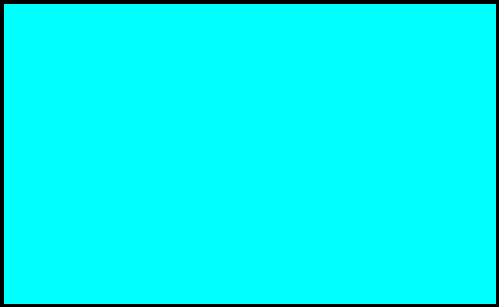

In [5]:
from module import figurecanvas
figurecanvas()

To this Figure class, one or more Axes instances are added:

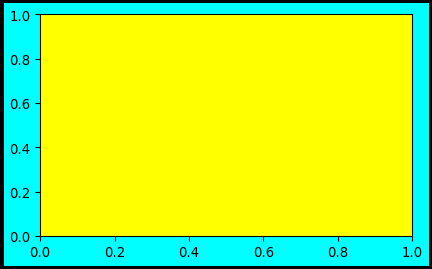

In [6]:
from module import axes
axes()

The Axes above contain no data and are normalised. Axes labels can be added to this Axes:

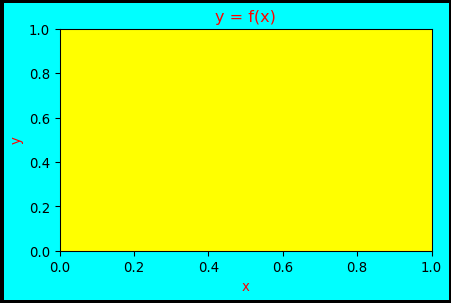

In [7]:
from module import axes_label
axes_label()

Finally a plotting method is used to plot data. The plotted data is an instance of another class:

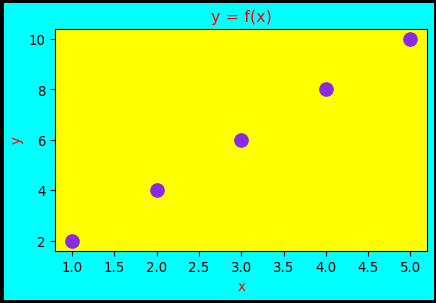

In [8]:
from module import plot
plot()

## Importing Libraries

To create numeric data the numpy library is imported:

In [9]:
import numpy as np

It can be imported and its name and version checked using:

In [10]:
np.__name__

'numpy'

In [11]:
np.__version__

'1.25.1'

In [12]:
np.__file__

'c:\\Users\\pyip\\AppData\\Local\\mambaforge\\envs\\jupyterlab\\Lib\\site-packages\\numpy\\__init__.py'

matplotlib can similarly be imported:

In [13]:
import matplotlib

In [14]:
matplotlib.__name__

'matplotlib'

In [15]:
matplotlib.__version__

'3.7.1'

In [16]:
matplotlib.__file__

'c:\\Users\\pyip\\AppData\\Local\\mambaforge\\envs\\jupyterlab\\Lib\\site-packages\\matplotlib\\__init__.py'

However matplotlib is a very large library and for the vast majority of cases only a single module, the python plot module pyplot is interacted with. It is normally imported using the three letter alias plt:

In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.__name__

'matplotlib.pyplot'

In [19]:
plt.__file__

'c:\\Users\\pyip\\AppData\\Local\\mambaforge\\envs\\jupyterlab\\Lib\\site-packages\\matplotlib\\pyplot.py'

## pyplot Identifiers

The pyplot has a large number of identifiers. 

In [20]:
for identifier in dir(plt):
    print(identifier, end=' ')

Annotation Arrow Artist AutoLocator Axes Button Circle Enum ExitStack Figure FigureBase FigureCanvasBase FigureManagerBase FixedFormatter FixedLocator FormatStrFormatter Formatter FuncFormatter GridSpec IndexLocator Line2D LinearLocator Locator LogFormatter LogFormatterExponent LogFormatterMathtext LogLocator MaxNLocator MouseButton MultipleLocator Normalize NullFormatter NullLocator Number PolarAxes Polygon Rectangle ScalarFormatter Slider Subplot SubplotSpec Text TickHelper Widget _REPL_DISPLAYHOOK _ReplDisplayHook __builtins__ __cached__ __doc__ __file__ __loader__ __name__ __package__ __spec__ _api _auto_draw_if_interactive _backend_mod _copy_docstring_and_deprecators _docstring _draw_all_if_interactive _get_backend_mod _get_pyplot_commands _get_required_interactive_framework _interactive_bk _log _pylab_helpers _warn_if_gui_out_of_main_thread acorr angle_spectrum annotate arrow autoscale autumn axes axhline axhspan axis axline axvline axvspan bar bar_label barbs barh bone box boxpl

These can be examined in groups. The following are data model attributes:

In [21]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isdatamodel = (identifier[0:2] == '__')
    if (not isfunction and not isupper and isdatamodel):
        print(identifier, end=' ')

__builtins__ __cached__ __doc__ __file__ __loader__ __name__ __package__ __spec__ 

These are used to give details about the module as seen above.

There are also a number of internal attributes:

In [22]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isdatamodel = (identifier[0:1] == '_') & (identifier[0:2] != '__') 
    if (not isfunction and not isupper and isdatamodel):
        print(identifier, end=' ')

_REPL_DISPLAYHOOK _api _docstring _interactive_bk _log _pylab_helpers 

And internal functions:

In [23]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isdatamodel = (identifier[0:1] == '_') & (identifier[0:2] != '__') 
    if (isfunction and not isupper and isdatamodel):
        print(identifier, end=' ')

_ReplDisplayHook _auto_draw_if_interactive _backend_mod _copy_docstring_and_deprecators _draw_all_if_interactive _get_backend_mod _get_pyplot_commands _get_required_interactive_framework _warn_if_gui_out_of_main_thread 

These internal attributes and methods are not normally used directly by the end user.

The pyplot module has a number of attributes. Notice that all of these are other modules:

In [24]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isdatamodel = (identifier[0:1] == '_')
    if (not isfunction and not isupper and not isdatamodel):
        print(identifier, end=' ')

cbook cm color_sequences functools importlib inspect logging matplotlib mlab np rcParams rcParamsDefault rcParamsOrig rcsetup re style sys threading time 

If the pyplot file is examined:

In [25]:
print(plt.__file__)

c:\Users\pyip\AppData\Local\mambaforge\envs\jupyterlab\Lib\site-packages\matplotlib\pyplot.py


Notice that the pyplot module imports

* Python standard modules: functools, importlib, inspect,logging, re, sys, threading, time

* Third party libraries: numpy, matplotlib

* Other modules from matplotlib: colorbar, image

In addition to individual objects from Python standard modules, third-party libraries and other matplotlib modules.

These are all known as **dependencies** of pyplot. Everything imported within pyplot is accessible in the main namespace. Because numpy was imported as np in the pyplot module which was in turn imported using the alias plt, it becomes np.plt in the global namespace:

In [26]:
np == plt.np

True

np is not typically used in the global namespace as an attribute fo the pyplot module i.e. it is very rare for a user to instantiate an array using:

In [27]:
plt.np.array([0, 1, 2, 3, 4])

array([0, 1, 2, 3, 4])

When numpy is used directly in the global namespace, it is imported directly into the global namespace using the alias np:

In [28]:
import numpy as np

In [29]:
np.array([0, 1, 2, 3, 4])

array([0, 1, 2, 3, 4])

Therefore these pyplot attributes are not typically used in the global namespace. If functionality from these modules or libraries is required, they are normally imported directly.

The classes are in CamelCase:

In [30]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isdatamodel = (identifier[0:1] == '_')
    if (isfunction and isupper and not isdatamodel):
        print(identifier, end=' ')

Annotation Arrow Artist AutoLocator Axes Button Circle Enum ExitStack Figure FigureBase FigureCanvasBase FigureManagerBase FixedFormatter FixedLocator FormatStrFormatter Formatter FuncFormatter GridSpec IndexLocator Line2D LinearLocator Locator LogFormatter LogFormatterExponent LogFormatterMathtext LogLocator MaxNLocator MouseButton MultipleLocator Normalize NullFormatter NullLocator Number PolarAxes Polygon Rectangle ScalarFormatter Slider Subplot SubplotSpec Text TickHelper Widget 

Notice that these classes are imported into pyplot from their perspective modules:

In [31]:
print(plt.__file__)

c:\Users\pyip\AppData\Local\mambaforge\envs\jupyterlab\Lib\site-packages\matplotlib\pyplot.py


The modules show what classes are related to one another. The most two important classes are **Figure** and **Axes**. The Figure class is the Figure canvas instance and the Axes class is the Axes instance which is placed on the Figure canvas. Most of the other classes are additional instances which display the data on the Axes instance.

The pyplot module is configured for functional programming and as a consequence there are a large number of functions in pyplot:

In [32]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isdatamodel = (identifier[0:1] == '_')
    if (isfunction and not isupper and not isdatamodel):
        print(identifier, end=' ')

acorr angle_spectrum annotate arrow autoscale autumn axes axhline axhspan axis axline axvline axvspan bar bar_label barbs barh bone box boxplot broken_barh cla clabel clf clim close cohere colorbar colormaps connect contour contourf cool copper csd cycler delaxes disconnect draw draw_all draw_if_interactive errorbar eventplot figaspect figimage figlegend fignum_exists figtext figure fill fill_between fill_betweenx findobj flag gca gcf gci get get_backend get_cmap get_current_fig_manager get_figlabels get_fignums get_plot_commands get_scale_names getp ginput gray grid hexbin hist hist2d hlines hot hsv imread imsave imshow inferno install_repl_displayhook interactive ioff ion isinteractive jet legend locator_params loglog magma magnitude_spectrum margins matshow minorticks_off minorticks_on new_figure_manager nipy_spectral pause pcolor pcolormesh phase_spectrum pie pink plasma plot plot_date polar prism psd quiver quiverkey rc rc_context rcdefaults register_cmap rgrids savefig sca scatte

A number of functions in pyplot are related to the Figure instance and are therefore identifiers in the Figure class. Most of these functions add something to a Figure canvas for example an Axes instance:

In [33]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isinfigure = identifier in dir(plt.Figure)
    isinaxes = identifier in dir(plt.Axes)
    isdatamodel = (identifier[0:1] == '_')
    if (isinfigure and not isinaxes and isfunction and not isupper and not isdatamodel):
        print(identifier, end=' ')

clf colorbar delaxes figimage gca ginput savefig sca show subplot_mosaic subplots subplots_adjust suptitle tight_layout waitforbuttonpress 

A number of functions in pyplot are related to the Axes instance and are therefore identifiers in the Axes class. Most of these functions add something to the Axes and are essentially plotting functions:

In [34]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isinfigure = identifier in dir(plt.Figure)
    isinaxes = identifier in dir(plt.Axes)
    isdatamodel = (identifier[0:1] == '_')
    if (not isinfigure and isinaxes and isfunction and not isupper and not isdatamodel):
        print(identifier, end=' ')

acorr angle_spectrum annotate arrow autoscale axhline axhspan axis axline axvline axvspan bar bar_label barbs barh boxplot broken_barh cla clabel cohere contour contourf csd errorbar eventplot fill fill_between fill_betweenx grid hexbin hist hist2d hlines imshow locator_params loglog magnitude_spectrum margins matshow minorticks_off minorticks_on pcolor pcolormesh phase_spectrum pie plot plot_date psd quiver quiverkey scatter semilogx semilogy specgram spy stackplot stairs stem step streamplot table tick_params ticklabel_format tricontour tricontourf tripcolor triplot twinx twiny violinplot vlines xcorr 

There are a number of additional functions that have equivalent get and set methods in the Axes class:

In [35]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isinfigure = identifier in dir(plt.Figure)
    isinaxes = identifier in dir(plt.Axes)
    isinaxes2 = 'set_' + identifier in dir(plt.Axes)
    isdatamodel = (identifier[0:1] == '_')
    if (not isinfigure and not isinaxes and isinaxes2 and isfunction and not isupper and not isdatamodel):
        print(identifier, end=' ')

figure title xlabel xlim xscale xticks ylabel ylim yscale yticks 

A number of identifiers are also colormaps, colormaps are used to visually distinguish 3d data on 2d plots through the use of color:

In [36]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isinfigure = identifier in dir(plt.Figure)
    isinaxes = identifier in dir(plt.Axes)
    isinaxes2 = 'set_' + identifier in dir(plt.Axes)
    iscolormap = identifier in plt.colormaps()
    isdatamodel = (identifier[0:1] == '_')
    if (not isinfigure and not isinaxes and not isinaxes2 and iscolormap and isfunction and not isupper and not isdatamodel):
        print(identifier, end=' ')

autumn bone cool copper flag gray hot hsv inferno jet magma nipy_spectral pink plasma prism spring summer viridis winter 

There are a number of additional functions that can be invoked from pyplot that don't have equivalents in the above categories:

In [37]:
for identifier in dir(plt):
    isfunction = callable(getattr(plt, identifier))
    isupper = identifier[0].isupper()
    isinfigure = identifier in dir(plt.Figure)
    isinaxes = identifier in dir(plt.Axes)
    isinaxes2 = 'set_' + identifier in dir(plt.Axes)
    iscolormap = identifier in plt.colormaps()
    isdatamodel = (identifier[0:1] == '_')
    if (not isinfigure and not isinaxes and not isinaxes2 and not iscolormap and isfunction and not isupper and not isdatamodel):
        print(identifier, end=' ')

box clim close colormaps connect cycler disconnect draw_all draw_if_interactive figaspect figlegend fignum_exists figtext gcf gci get get_backend get_cmap get_current_fig_manager get_figlabels get_fignums get_plot_commands get_scale_names getp imread imsave install_repl_displayhook interactive ioff ion isinteractive new_figure_manager pause polar rc rc_context rcdefaults register_cmap rgrids sci set_cmap set_loglevel setp subplot subplot2grid subplot_tool switch_backend thetagrids uninstall_repl_displayhook xkcd 

However some of these have equivalent methods with substantially different names:

In [38]:
? plt.box

Signature:  plt.box(on=None)
Docstring:
Turn the axes box on or off on the current axes.

Parameters
----------
on : bool or None
    The new `~matplotlib.axes.Axes` box state. If ``None``, toggle
    the state.

See Also
--------
:meth:`matplotlib.axes.Axes.set_frame_on`
:meth:`matplotlib.axes.Axes.get_frame_on`
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\site-packages\matplotlib\pyplot.py
Type:      function

## Object Orientated Programming

matplotlib is configured for an Object Orientated Programming approach which is generally recommended when programming. This involves instantiation of a Figure instance using the Figure class:

In [39]:
? plt.Figure

Init signature:
 plt.Figure(
    figsize=None,
    dpi=None,
    *,
    facecolor=None,
    edgecolor=None,
    linewidth=0.0,
    frameon=None,
    subplotpars=None,
    tight_layout=None,
    constrained_layout=None,
    layout=None,
    **kwargs,
)
Docstring:     
The top level container for all the plot elements.

Attributes
----------
patch
    The `.Rectangle` instance representing the figure background patch.

suppressComposite
    For multiple images, the figure will make composite images
    depending on the renderer option_image_nocomposite function.  If
    *suppressComposite* is a boolean, this will override the renderer.
Init docstring:
Parameters
----------
figsize : 2-tuple of floats, default: :rc:`figure.figsize`
    Figure dimension ``(width, height)`` in inches.

dpi : float, default: :rc:`figure.dpi`
    Dots per inch.

facecolor : default: :rc:`figure.facecolor`
    The figure patch facecolor.

edgecolor : default: :rc:`figure.edgecolor`
    The figure patch edge co

If all the keyword arguments are left at their default values:

In [40]:
fig = plt.Figure()

This Figure can be shown by inputting:

In [41]:
fig

<Figure size 640x480 with 0 Axes>

When the canvas is blank only details about the Figure will be shown. Notice that this Figure canvas includes 0 Axes. An instance of the Axes class needs to be instantiated:

In [42]:
? plt.Axes

Init signature:
 plt.Axes(
    fig,
    *args,
    facecolor=None,
    frameon=True,
    sharex=None,
    sharey=None,
    label='',
    xscale=None,
    yscale=None,
    box_aspect=None,
    **kwargs,
)
Docstring:     
An Axes object encapsulates all the elements of an individual (sub-)plot in
a figure.

It contains most of the (sub-)plot elements: `~.axis.Axis`,
`~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
and sets the coordinate system.

Like all visible elements in a figure, Axes is an `.Artist` subclass.

The `Axes` instance supports callbacks through a callbacks attribute which
is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
are 'xlim_changed' and 'ylim_changed' and the callback will be called with
func(*ax*) where *ax* is the `Axes` instance.

.. note::

    As a user, you do not instantiate Axes directly, but use Axes creation
    methods instead; e.g. from `.pyplot` or `.Figure`:
    `~.pyplot.subplots`, `~.pyplot.subplot_

The docstring for this class states that this class is not instantiated directly and instead a Figure method should be used to instantiate an Axes, for example the method add_axes:

In [43]:
? fig.add_axes

Signature:  fig.add_axes(*args, **kwargs)
Docstring:
Add an `~.axes.Axes` to the figure.

Call signatures::

    add_axes(rect, projection=None, polar=False, **kwargs)
    add_axes(ax)

Parameters
----------
rect : tuple (left, bottom, width, height)
    The dimensions (left, bottom, width, height) of the new
    `~.axes.Axes`. All quantities are in fractions of figure width and
    height.

projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
    The projection type of the `~.axes.Axes`. *str* is the name of
    a custom projection, see `~matplotlib.projections`. The default
    None results in a 'rectilinear' projection.

polar : bool, default: False
    If True, equivalent to projection='polar'.

axes_class : subclass type of `~.axes.Axes`, optional
    The `.axes.Axes` subclass that is instantiated.  This parameter
    is incompatible with *projection* and *polar*.  See
    :ref:`axisartist_users-guide-index` for examples.

sharex, 

A Figure instance is instantiated:

In [44]:
fig = plt.Figure()

The method add_axes creates an Axes instance from a rectangle. Recall the Figure instance is 640 pixels wide by 480 pixels in height. Note however the rectangle uses normalised dimensions of the figure canvas:

In [45]:
left = 0 # 0 pixels
bottom = 0 # 0 pixels
width = 1 # 640 pixels
height = 1 # 480 pixels

ax1 = fig.add_axes(rect=(left, bottom, width, height))

Notice that ax1 is an instance of Axes but has no information:

In [46]:
ax1

<Axes: >

The Figure instance fig with the Axes instance ax1 can now be seen:

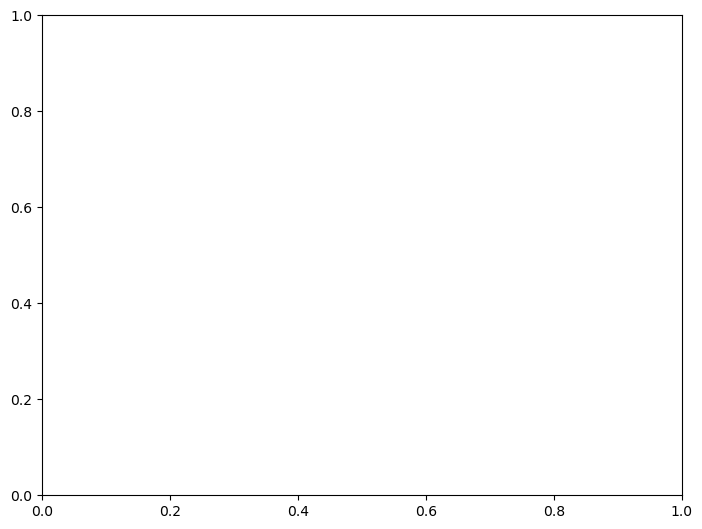

In [47]:
fig

A second Axes instance can be added to the Figure instance using:

In [48]:
left = 0.2 # 128 pixels
bottom = 0.2 # 96 pixels
width = 0.5 # 320 pixels
height = 0.5 # 240 pixels

ax2 = fig.add_axes(rect=(left, bottom, width, height))

It also has no information:

In [49]:
ax2

<Axes: >

Information can be added using the axis labels:

In [50]:
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('y(x)')

Text(0.5, 1.0, 'y(x)')

In [51]:
ax2

<Axes: title={'center': 'y(x)'}, xlabel='x', ylabel='y'>

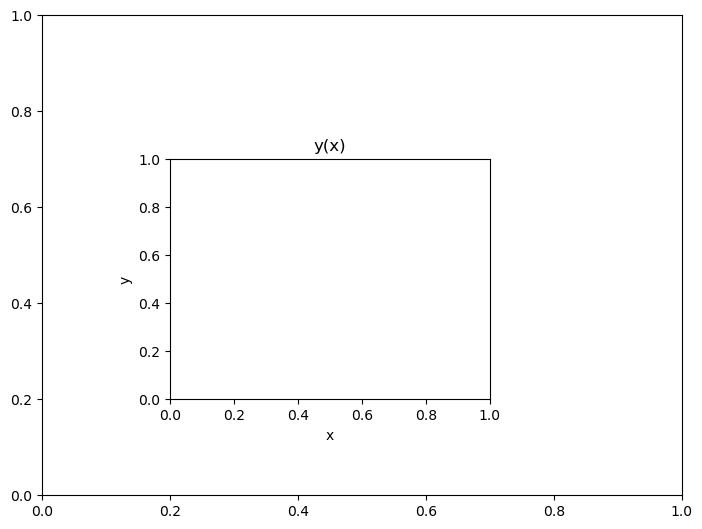

In [52]:
fig

The data plotted is usually in the form of ndarrays. In this case independent x data and dependent y data:

In [53]:
x

array([0, 1, 2, 3, 4, 5])

In [54]:
y

array([1.0000e-03, 2.0010e+00, 3.9990e+00, 5.9990e+00, 8.0020e+00,
       1.0001e+01])

They are plotted using an Axes method:

In [55]:
? ax2.plot

Signature:  ax2.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y

The most simple plot will be created leaving all the keyword input arguments at their default:

In [56]:
chart = ax2.plot(x, y)

If the chart is examined, notice that it is a list of Line2D objects (in this case a single line):

In [57]:
chart

A single Line2D instance can be accessed by indexing:

In [58]:
line = chart[0]

If fig is examined, the two Axes instances ax1 and ax2 display. The axes labels and Line2D instance line display on ax2:

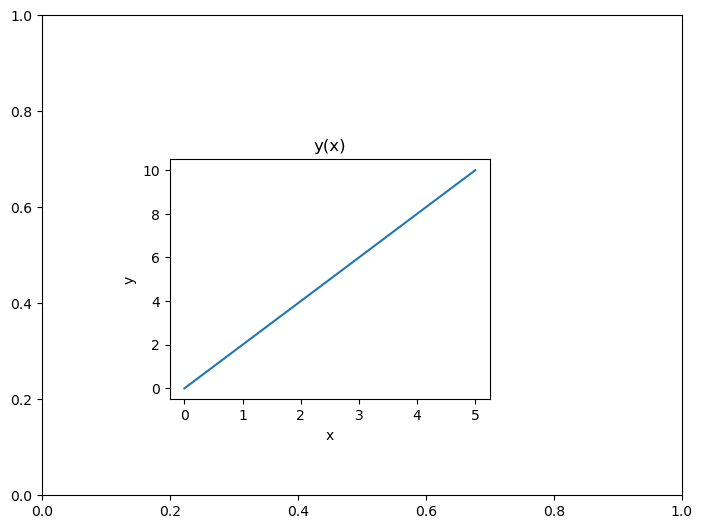

In [59]:
fig

Notice that methods can be accessed from these four objects:

In [60]:
# fig.

In [61]:
# ax1.

In [62]:
# ax2.

In [63]:
# line.

For example the Line2D method get_color can be used to get the color of the Line2D instance:

In [64]:
line.get_color()

'#1f77b4'

And the matching set_color method can be used to set the color to 'tomato':

In [65]:
line.set_color('tomato')

If fig is re-examined the line is updated:

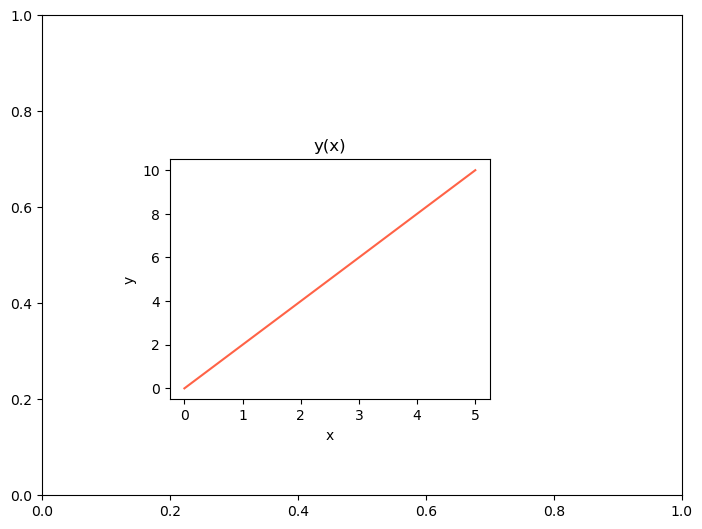

In [66]:
fig

Bringing this together:

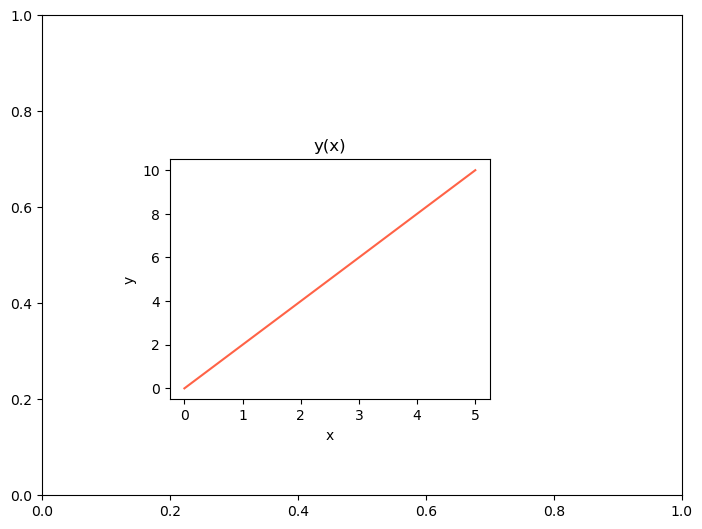

In [67]:
fig = plt.Figure()
ax1 = fig.add_axes(rect=(0, 0, 1, 1))
ax2 = fig.add_axes(rect=(0.2, 0.2, 0.5, 0.5))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('y(x)')
line = ax2.plot(x, y)[0]
line.set_color('tomato')

fig

Normally the properties of the plot are specified when creating the plot, for example the color rcan be specified as a keyword argument in the plot function:

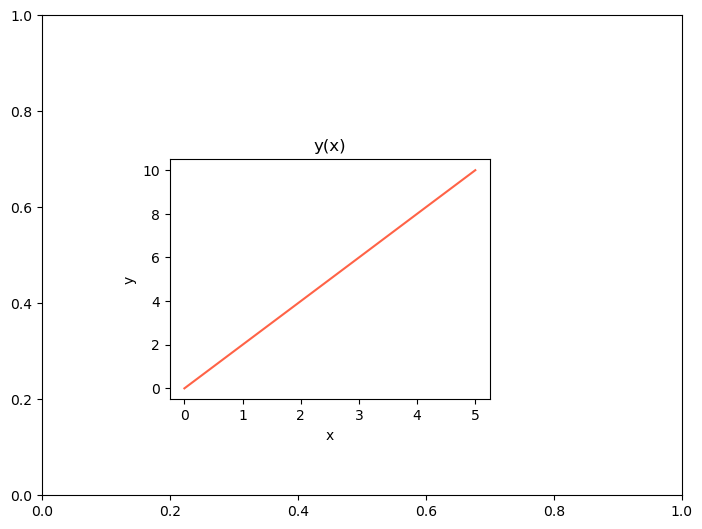

In [68]:
fig = plt.Figure()
ax1 = fig.add_axes(rect=(0, 0, 1, 1))
ax2 = fig.add_axes(rect=(0.2, 0.2, 0.5, 0.5))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('y(x)')
line = ax2.plot(x, y, color='tomato')[0]

fig

If only the Figure instance is instantiated to an instance name, then the return value of the last object will be displayed in the cell output:

In [69]:
fig = plt.Figure()
fig.add_axes(rect=(0, 0, 1, 1))
fig.add_axes(rect=(0.2, 0.2, 0.5, 0.5))

<Axes: >

This can be suppressed with a semicolon:

In [70]:
fig = plt.Figure()
fig.add_axes(rect=(0, 0, 1, 1));
fig.add_axes(rect=(0.2, 0.2, 0.5, 0.5));

The Axes can be accessed from the Figure using the Figure axes attribute:

In [71]:
fig.axes

[<Axes: >, <Axes: >]

And then the Axes instance of interest can be assigned to an instance name:

In [72]:
ax2 = fig.axes[1]

In [73]:
ax2.set_xlabel('x');
fig.axes[1].set_ylabel('y');
ax2.set_title('y(x)');

Notice the Axes is now updated in the Figure attribute axes:

In [74]:
fig.axes

[<Axes: >, <Axes: title={'center': 'y(x)'}, xlabel='x', ylabel='y'>]

Likewise the Axes instance has the attribute Figure:

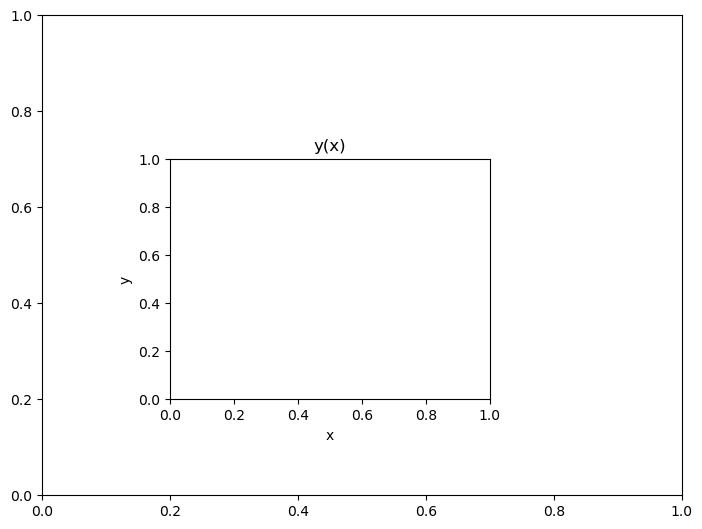

In [75]:
ax2.figure

And:

In [76]:
ax2.figure == fig

True

And if a line is added:

In [77]:
chart = ax2.plot(x, y) # list of Line2D

In [78]:
line = ax2.plot(x, y)[0]

This has the attribute axes and figure:

In [79]:
line.axes

<Axes: title={'center': 'y(x)'}, xlabel='x', ylabel='y'>

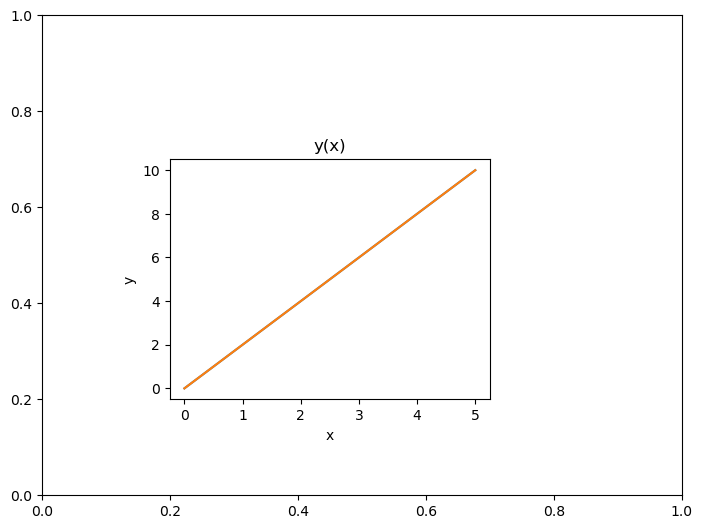

In [80]:
line.figure

If a Figure is instantiated without an instance name:

In [81]:
plt.Figure()

<Figure size 640x480 with 0 Axes>

The cell output displays details about this Figure. The last Figure is the currently selected figure. The get current figure pyplot function gcf can be used to select this Figure:

In [82]:
plt.gcf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

And assign it to an instance name:

In [83]:
fig = plt.gcf()

<Figure size 640x480 with 0 Axes>

If two Axes instance are added to the currently selected Figure without instance names:

In [84]:
fig.add_axes(rect=(0, 0, 1, 1))

<Axes: >

In [85]:
fig.add_axes(rect=(0.2, 0.2, 0.5, 0.5))

<Axes: >

The last Axes is the currently selected Axes and can be accessed using the get current axes pyplot function gca:

<Axes: >

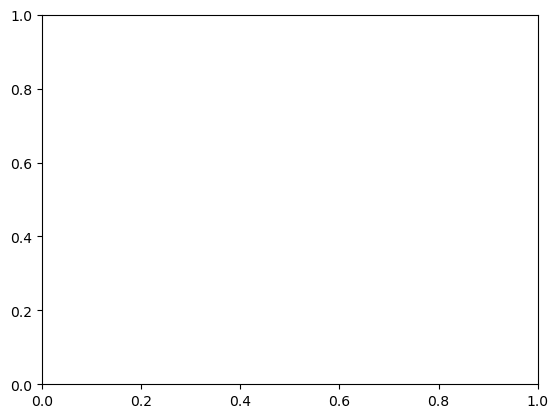

In [86]:
plt.gca()

Or Figure method gca:

In [87]:
fig.gca()

<Axes: >

If the currently selected Axes is assigned to an instance name:

In [88]:
ax2 = fig.gca()

In [89]:
ax2

<Axes: >

Then Axes labels and plot can be added:

In [90]:
ax2.set_xlabel('x')
fig.axes[1].set_ylabel('y')
ax2.set_title('y(x)')
line = ax2.plot(x, y)[0]

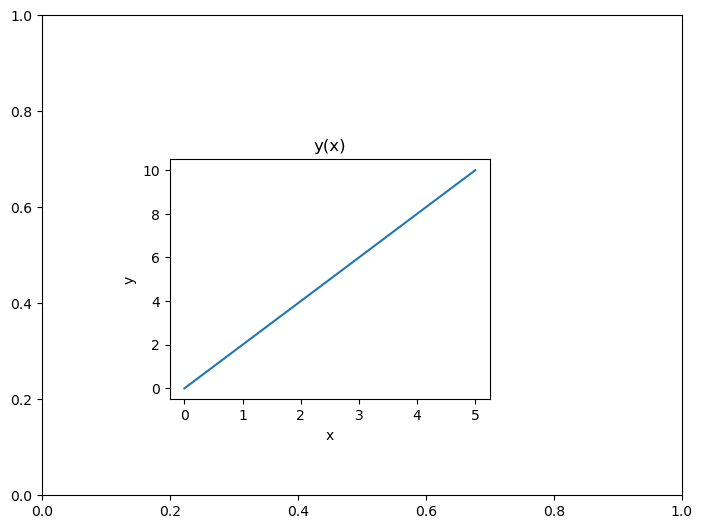

In [91]:
fig

## Subplots

Instead of creating an Axes using a rectangle, it is more common to create an Axes using a subplot:

In [92]:
fig = plt.Figure()

The Figure method add_subplot can be used to add a subplot using three integers nrows, ncols and index. nrows and ncols corresponding to the number of rows and number of columns to be created in the subplot respectively. The subplots index is row-ordered:

In [93]:
? fig.add_subplot

Signature:  fig.add_subplot(*args, **kwargs)
Docstring:
Add an `~.axes.Axes` to the figure as part of a subplot arrangement.

Call signatures::

   add_subplot(nrows, ncols, index, **kwargs)
   add_subplot(pos, **kwargs)
   add_subplot(ax)
   add_subplot()

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will
      take the *index* position on a grid with *nrows* rows and
      *ncols* columns. *index* starts at 1 in the upper left corner
      and increases to the right.  *index* can also be a two-tuple
      specifying the (*first*, *last*) indices (1-based, and including
      *last*) of the subplot, e.g., ``fig.add_subplot(3, 1, (1, 2))``
      makes a subplot that spans the upper 2/3 of the figure.
    - A 3-digit integer. The digits are interpreted as if given
      separately as three single-digit integers, i.e.
      ``

The most common is a 1 row by 1 column with a single index 1 subplot:

In [94]:
fig.add_subplot(1, 1, 1) # nrows ncols index

<Axes: >

Notice this creates an Axes instance that spans the full Figure canvas instance:

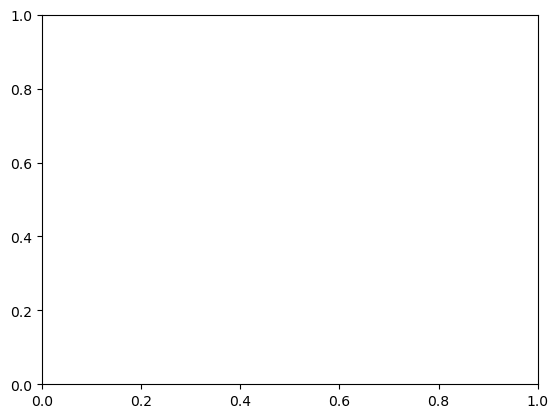

In [95]:
fig

A Figure can be instantiated with a subplot specification of 2 rows by 1 column and an Axes instance at index 1:

In [96]:
fig = plt.Figure()
fig.add_subplot(2, 1, 1) # nrows ncols index

<Axes: >

If the Figure canvas is displayed, only half the canvas displays as the other half is empty:

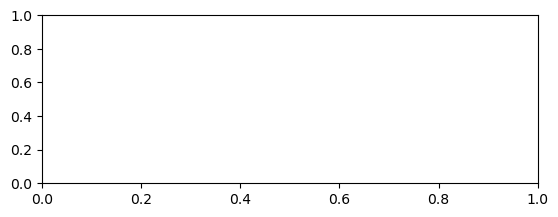

In [97]:
fig

An Axes at the second index is also be added:

In [98]:
fig.add_subplot(2, 1, 2) #nrows ncols index

<Axes: >

And the FIgure instance examined, both Axes instances now display:

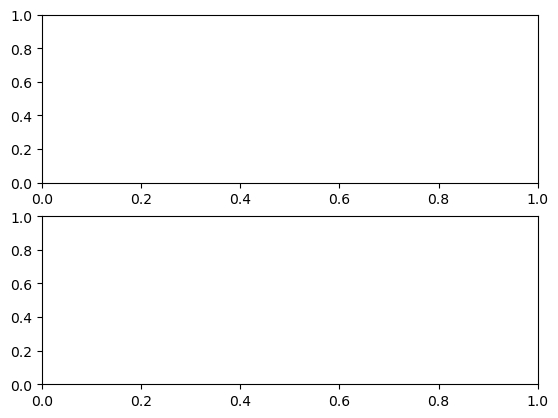

In [99]:
fig

A Figure instance with a subplots specification of 2 rows by 2 columns can be instantiated. Axes can be added at index 1, 2 and 3 leavind index 4 blank:

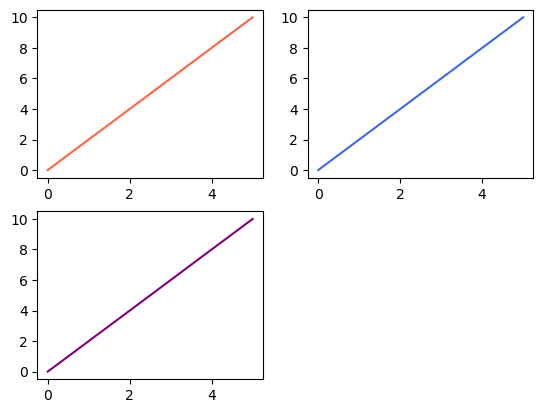

In [100]:
fig = plt.Figure()
ax1 = fig.add_subplot(2, 2, 1) #nrows ncols index
ax1.plot(x, y, color='tomato')
ax2 = fig.add_subplot(2, 2, 2) #nrows ncols index
ax2.plot(x, y, color='royalblue')
ax3 = fig.add_subplot(2, 2, 3) #nrows ncols index
ax3.plot(x, y, color='purple')

fig

This can be visualised as follows:

$$\begin{matrix}2\ \text{cols}&\\\left[\begin{matrix}1&2\\3&4\\\end{matrix}\right]&2\ \text{rows}\\\end{matrix}$$

An Axes can occupy multiple neighbouring index positions:

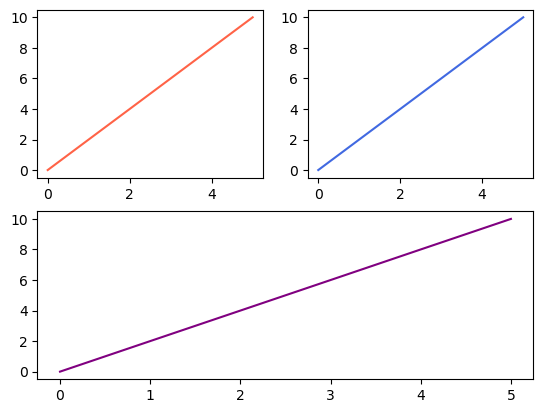

In [101]:
fig = plt.Figure()
ax1 = fig.add_subplot(2, 2, 1) #nrows ncols index
ax1.plot(x, y, color='tomato')
ax2 = fig.add_subplot(2, 2, 2) #nrows ncols index
ax2.plot(x, y, color='royalblue')
ax3 = fig.add_subplot(2, 2, (3, 4)) #nrows ncols index
ax3.plot(x, y, color='purple')

fig

A related method is subplots:

In [102]:
fig = plt.Figure()

Instead of positional values for nrows and ncols these are keyword arguments with a default value of 1 each. Notice the exclusion of index:

In [103]:
? fig.subplots

Signature:
 fig.subplots(
    nrows=1,
    ncols=1,
    *,
    sharex=False,
    sharey=False,
    squeeze=True,
    width_ratios=None,
    height_ratios=None,
    subplot_kw=None,
    gridspec_kw=None,
)
Docstring:
Add a set of subplots to this figure.

This utility wrapper makes it convenient to create common layouts of
subplots in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of x-axis (*sharex*) or y-axis (*sharey*):

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False or 'none': each subplot x- or y-axis will be independent.
    - 'row': each subplot row will share an x- or y-axis.
    - 'col': each subplot column will share an x- or y-axis.

    When subplots have a shared x-axis along a column, only the x tick
    labels of the bottom subplot are created. Similarly, when subplots
    have 

The return value for subplots is an Axes if nrows and ncols are 1:

In [104]:
ax = fig.subplots(nrows=1, ncols=1)
ax

<Axes: >

However more generally the return value is a ndarray of Axes:

In [105]:
fig = plt.Figure()
ax = fig.subplots(nrows=2, ncols=1)
ax

array([<Axes: >, <Axes: >], dtype=object)

This ndarray is indexed into to access the Axes. Notice that zero-order indexing is used which is normal for ndarrays:

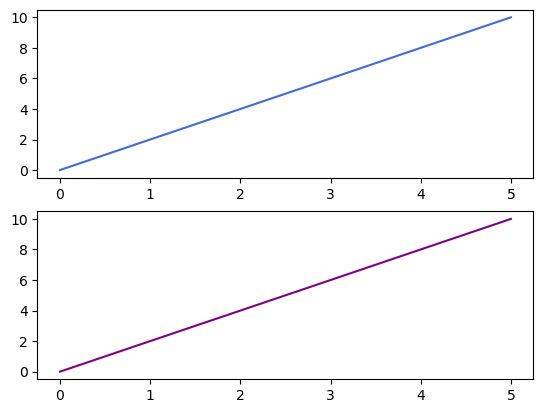

In [106]:
ax[0].plot(x, y, color='royalblue')
ax[1].plot(x, y, color='purple')
fig

For a scalar, using the default values of 1 for nrows and ncols, an Axes scalar will be returned:

In [107]:
fig = plt.Figure()
ax = fig.subplots()
ax

<Axes: >

For a row vector or a column vector a 1darray will be output:

In [108]:
fig = plt.Figure()
ax = fig.subplots(nrows=2, ncols=1)
ax

array([<Axes: >, <Axes: >], dtype=object)

In [109]:
fig = plt.Figure()
ax = fig.subplots(nrows=1, ncols=2)
ax

array([<Axes: >, <Axes: >], dtype=object)

For any other dimensions a 2darray will be output:

In [110]:
fig = plt.Figure()
ax = fig.subplots(nrows=2, ncols=2)
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

This can be indexed into to select each Axes:

In [111]:
ax[0, 0].plot(x, y, color='tomato')
ax[0, 1].plot(x, y, color='royalblue')
ax[1, 0].plot(x, y, color='purple')

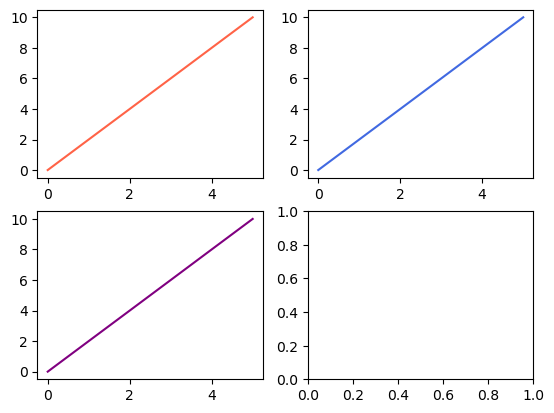

In [112]:
fig

Notice when the Figure method subplots is used all subplots display and therefore the last subplot has a normalised Axes with no data. 

Another common way to create a subplot is using subplot_mosaic which essnetially configures a mapping of Axes:

In [113]:
fig = plt.Figure()

In [114]:
? fig.subplot_mosaic

Signature:
 fig.subplot_mosaic(
    mosaic,
    *,
    sharex=False,
    sharey=False,
    width_ratios=None,
    height_ratios=None,
    empty_sentinel='.',
    subplot_kw=None,
    per_subplot_kw=None,
    gridspec_kw=None,
)
Docstring:
Build a layout of Axes based on ASCII art or nested lists.

This is a helper function to build complex GridSpec layouts visually.

See :doc:`/gallery/subplots_axes_and_figures/mosaic`
for an example and full API documentation

Parameters
----------
mosaic : list of list of {hashable or nested} or str

    A visual layout of how you want your Axes to be arranged
    labeled as strings.  For example ::

       x = [['A panel', 'A panel', 'edge'],
            ['C panel', '.',       'edge']]

    produces 4 Axes:

    - 'A panel' which is 1 row high and spans the first two columns
    - 'edge' which is 2 rows high and is on the right edge
    - 'C panel' which in 1 row and 1 column wide in the bottom left
    - a blank space 1 row and 1 column wide in the

In [115]:
ax = fig.subplot_mosaic(mosaic=[['tomato', 'purple'],
                                ['royalblue', 'purple']])
ax

{'tomato': <Axes: label='tomato'>,
 'purple': <Axes: label='purple'>,
 'royalblue': <Axes: label='royalblue'>}

The key is used to return the respective Axes:

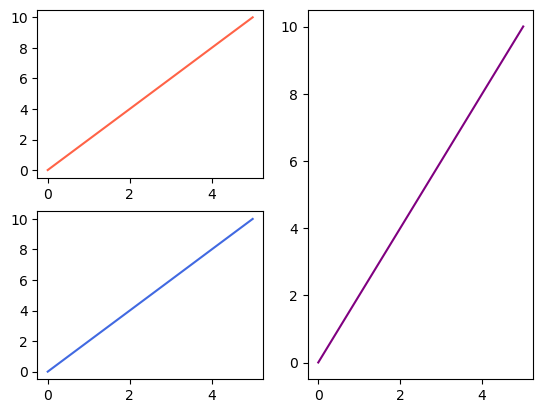

In [116]:
ax['tomato'].plot(x, y, color='tomato')
ax['purple'].plot(x, y, color='purple')
ax['royalblue'].plot(x, y, color='royalblue')
fig

## Functional Plotting

The pyplot module can also be used functionally. The figure function (lower case) is used to create a Figure instance (upper case) and acts as a Figure instance manager:

In [117]:
? plt.figure

Signature:
 plt.figure(
    num=None,
    figsize=None,
    dpi=None,
    *,
    facecolor=None,
    edgecolor=None,
    frameon=True,
    FigureClass=<class 'matplotlib.figure.Figure'>,
    clear=False,
    **kwargs,
)
Docstring:
Create a new figure, or activate an existing figure.

Parameters
----------
num : int or str or `.Figure` or `.SubFigure`, optional
    A unique identifier for the figure.

    If a figure with that identifier already exists, this figure is made
    active and returned. An integer refers to the ``Figure.number``
    attribute, a string refers to the figure label.

    If there is no figure with the identifier or *num* is not given, a new
    figure is created, made active and returned.  If *num* is an int, it
    will be used for the ``Figure.number`` attribute, otherwise, an
    auto-generated integer value is used (starting at 1 and incremented
    for each new figure). If *num* is a string, the figure label and the
    window title is set to this value.  I

The main difference here is the figure has the keyword argument argument num:

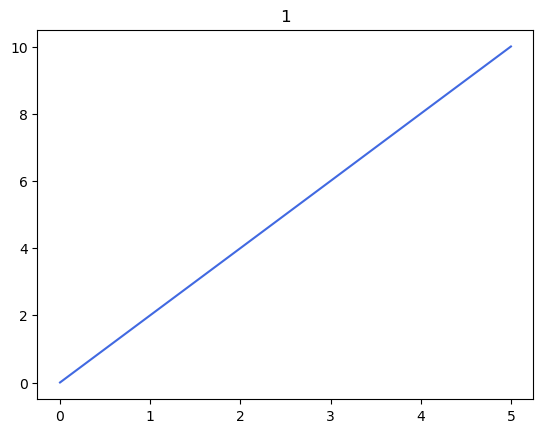

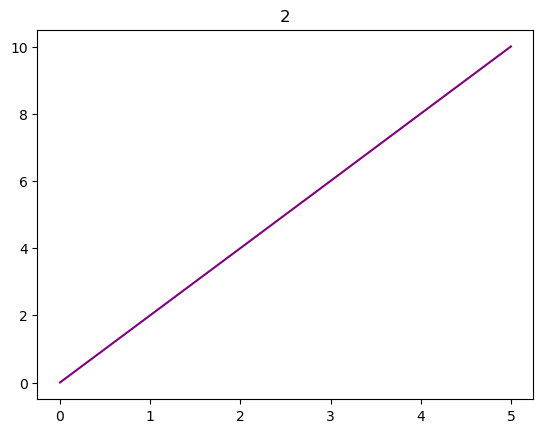

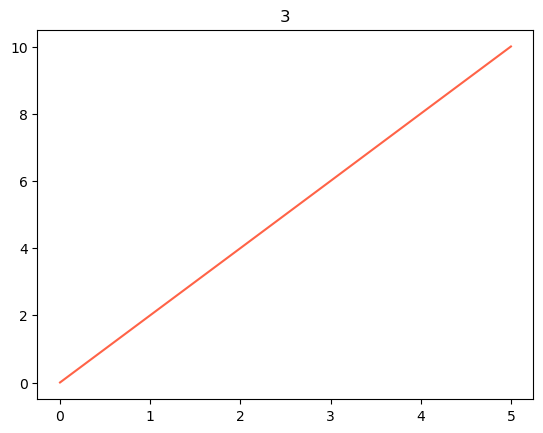

In [118]:
plt.figure(num=1)
plt.axes()
plt.title('1')
plt.plot(x, y, color='royalblue')

plt.figure(num=2)
plt.axes()
plt.title('2')
plt.plot(x, y, color='purple')

plt.figure(num=3)
plt.axes()
plt.title('3')
plt.plot(x, y, color='tomato')

In an interactive Python notebook, the figure manager operates independently for each cell and will display each plot. However within the cell the figure manager can be used to reselect a figure, notice how Figure 2 is udpated to have a line with a magenta color opposed to a purple color and that it displays at the end because it is re-selected:

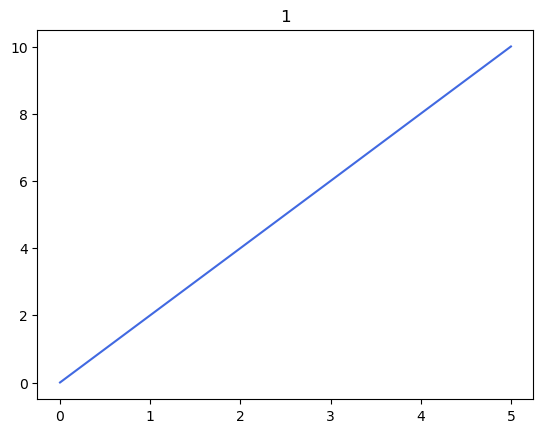

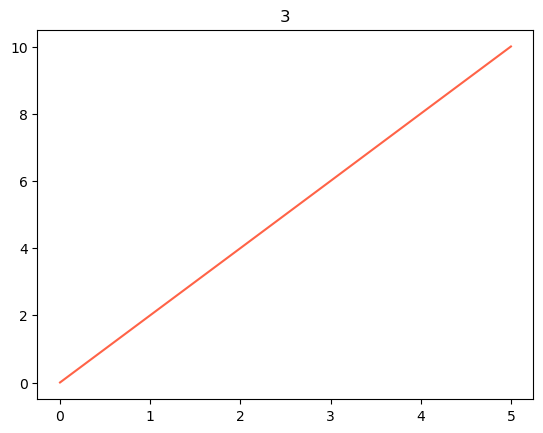

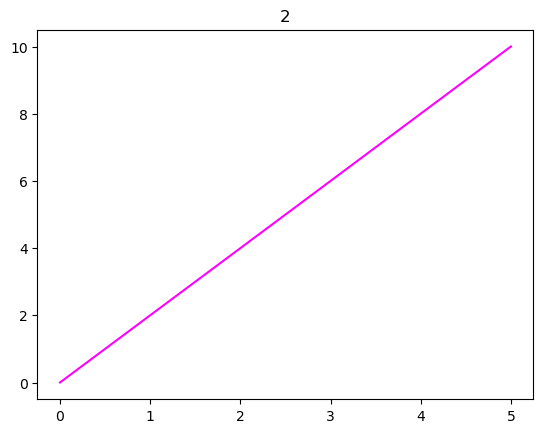

In [119]:
plt.figure(num=1);
plt.axes();
plt.title('1');
plt.plot(x, y, color='royalblue');

plt.figure(num=2);
plt.axes();
plt.title('2');
plt.plot(x, y, color='purple');

plt.figure(num=3);
plt.axes();
plt.title('3');
plt.plot(x, y, color='tomato');

plt.figure(num=2);
ax2 = plt.gca();
ax2.lines[0].set_color('magenta');

Many of the OOP methods examined above have a functional equivalent (although there might be some differences):

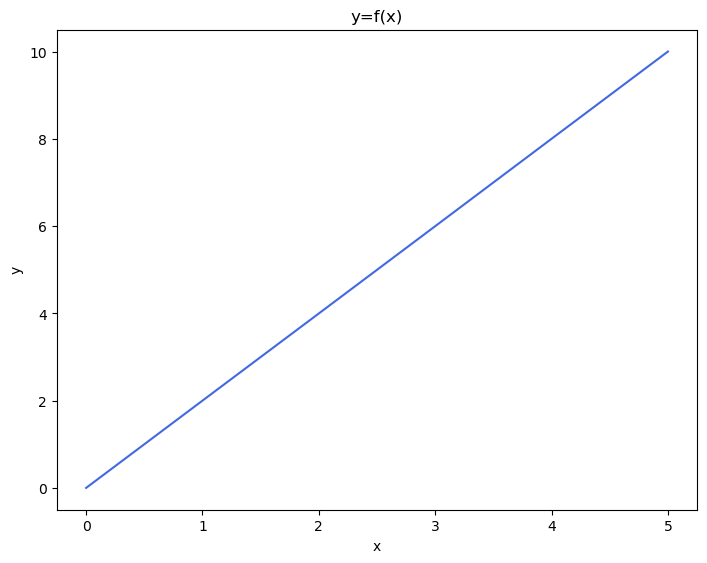

In [120]:
fig = plt.Figure()
ax = fig.add_axes(rect=(0, 0, 1, 1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=f(x)')
ax.plot(x, y, color='royalblue')

fig

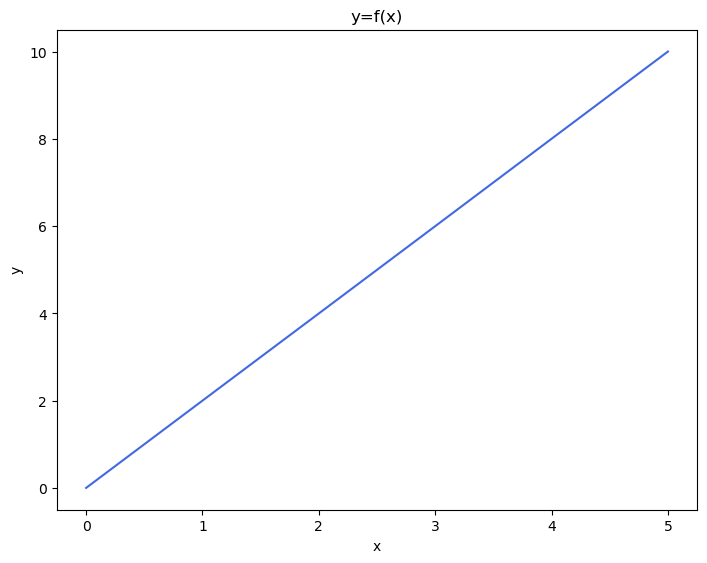

In [121]:
plt.figure(num=1)
plt.axes((0, 0, 1, 1))
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.plot(x, y, color='royalblue')

## Functional and Object Orientated Programming

Although these are functional, they have a return value which can be returned to an instance:

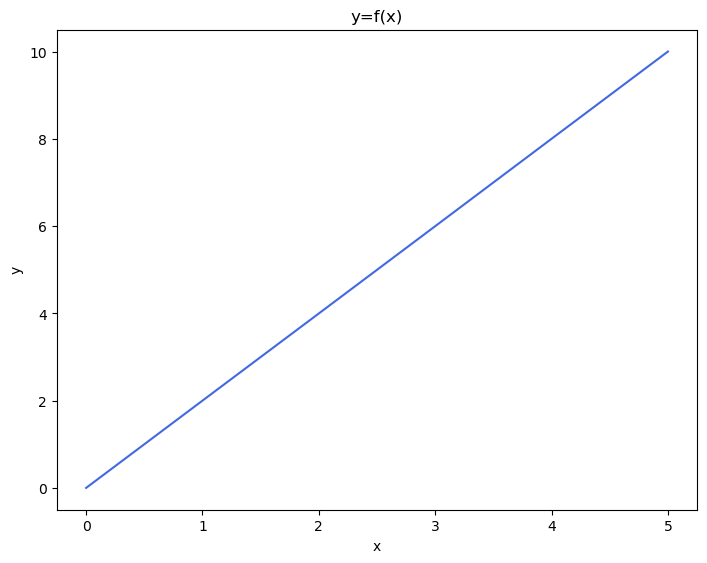

In [122]:
fig = plt.figure(num=1)
ax = plt.axes((0, 0, 1, 1))
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.plot(x, y, color='royalblue')

In [123]:
type(fig)

matplotlib.figure.Figure

In [124]:
type(ax)

matplotlib.axes._axes.Axes

A comparison can be made for the method add_subplot and the function subplot:

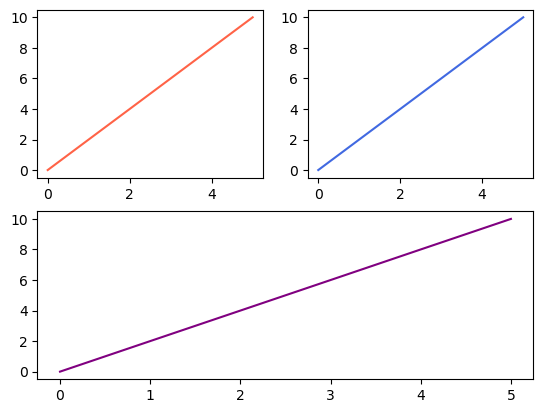

In [125]:
fig = plt.Figure()
ax1 = fig.add_subplot(2, 2, 1) #nrows ncols index
ax1.plot(x, y, color='tomato')
ax2 = fig.add_subplot(2, 2, 2) #nrows ncols index
ax2.plot(x, y, color='royalblue')
ax3 = fig.add_subplot(2, 2, (3, 4)) #nrows ncols index
ax3.plot(x, y, color='purple')

fig

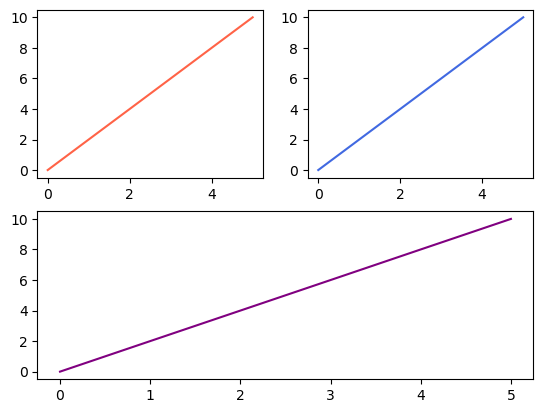

In [126]:
plt.figure(num=1)
plt.subplot(2, 2, 1)
plt.plot(x, y, color='tomato')
plt.subplot(2, 2, 2)
plt.plot(x, y, color='royalblue')
plt.subplot(2, 2, (3, 4))
plt.plot(x, y, color='purple')

The method subplots returns an ndarray of Axes and the functional counterparts essentially returns a tuple where the first element is the Figure and second element is the ndArray of Axes. This function takes all input arguments of the figure manager figure:

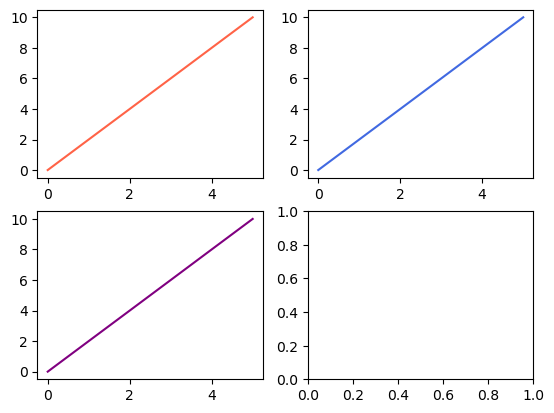

In [127]:
fig, ax = plt.subplots(nrows=2, ncols=2, num=1)
ax[0, 0].plot(x, y, color='tomato')
ax[0, 1].plot(x, y, color='royalblue')
ax[1, 0].plot(x, y, color='purple')

Since the input arguments default to 1, this is commonly used to instantiate a Figure with a single Axes subplot spanning the Figure canvas:

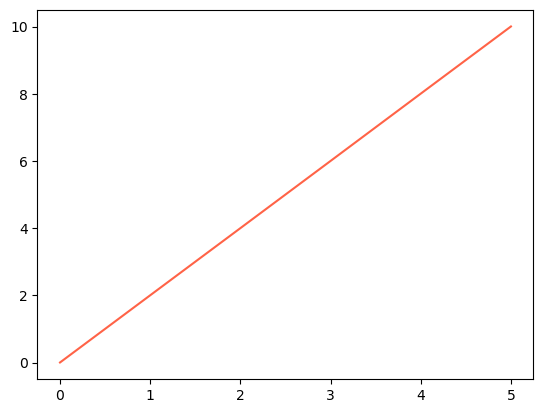

In [128]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='tomato');

The method subplot_mosaic returns a mapping of key: Axes pairs and the functional counterparts essentially returns a tuple where the first element is the Figure and second element is this mapping. This function also takes all input arguments of the figure manager figure:

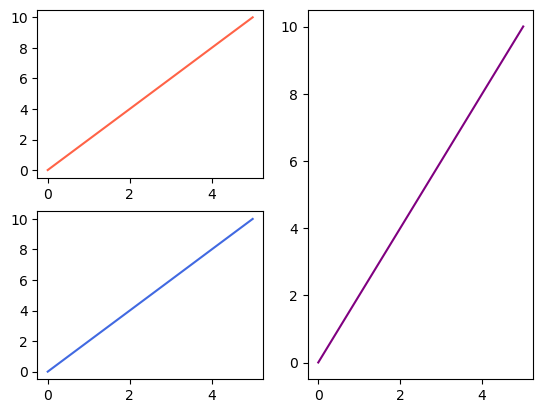

In [129]:
fig, ax = plt.subplot_mosaic(num=1,
                             mosaic=[['tomato', 'purple'],
                                     ['royalblue', 'purple']])
ax['tomato'].plot(x, y, color='tomato')
ax['purple'].plot(x, y, color='purple')
ax['royalblue'].plot(x, y, color='royalblue')

The pyplot module is therefore used with a combination of both functional and object orientated programming syntax by default, particularly for more advanced plots.

If a plotting function is created without a Figure and no Axes previously being instantiated, they will be inferred:

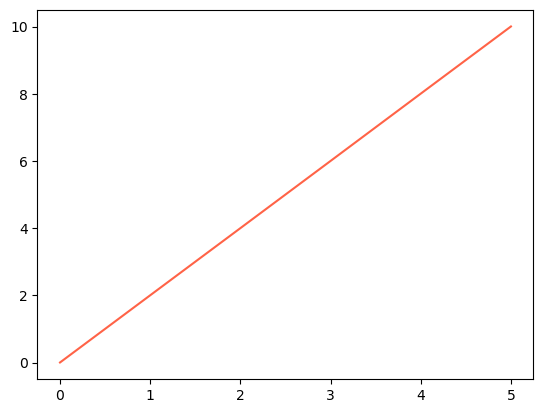

In [130]:
plt.plot(x, y, color='tomato')

## Text

### Axes Labels

The Axes labels can be set using OOP syntax:

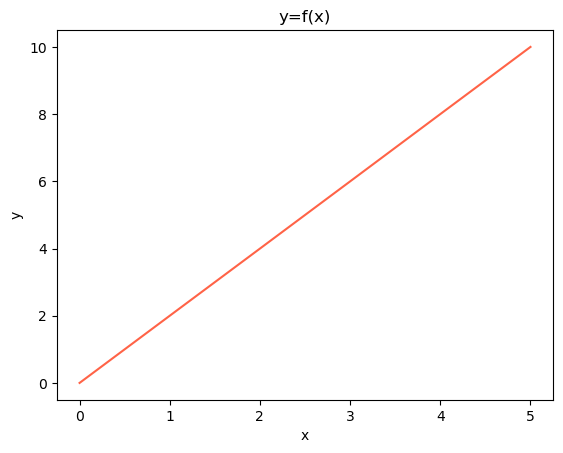

In [131]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='tomato');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_title('y=f(x)');

Or functionally:

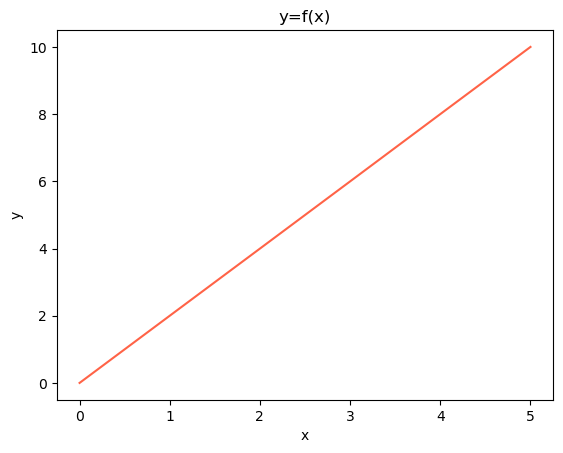

In [132]:
fig, ax = plt.subplots(num=1);
plt.plot(x, y, color='tomato');
plt.xlabel('x');
plt.ylabel('y');
plt.title('y=f(x)');

The docstring may be examined to see additional properties:

In [133]:
? plt.xlabel

Signature:  plt.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
Docstring:
Set the label for the x-axis.

Parameters
----------
xlabel : str
    The label text.

labelpad : float, default: :rc:`axes.labelpad`
    Spacing in points from the Axes bounding box including ticks
    and tick labels.  If None, the previous value is left as is.

loc : {'left', 'center', 'right'}, default: :rc:`xaxis.labellocation`
    The label position. This is a high-level alternative for passing
    parameters *x* and *horizontalalignment*.

Other Parameters
----------------
**kwargs : `.Text` properties
    `.Text` properties control the appearance of the label.

See Also
--------
text : Documents the properties supported by `.Text`.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\site-packages\matplotlib\pyplot.py
Type:      function

These are Text related so also have the following keyword input arguments:

In [134]:
? plt.Text

Init signature:
 plt.Text(
    x=0,
    y=0,
    text='',
    *,
    color=None,
    verticalalignment='baseline',
    horizontalalignment='left',
    multialignment=None,
    fontproperties=None,
    rotation=None,
    linespacing=None,
    rotation_mode=None,
    usetex=None,
    wrap=False,
    transform_rotates_text=False,
    parse_math=None,
    **kwargs,
)
Docstring:      Handle storing and drawing of text in window or data coordinates.
Init docstring:
Create a `.Text` instance at *x*, *y* with string *text*.

The text is aligned relative to the anchor point (*x*, *y*) according
to ``horizontalalignment`` (default: 'left') and ``verticalalignment``
(default: 'bottom'). See also
:doc:`/gallery/text_labels_and_annotations/text_alignment`.

While Text accepts the 'label' keyword argument, by default it is not
added to the handles of a legend.

Valid keyword arguments are:

Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and return

For example the following changes can be made to the xlabel;

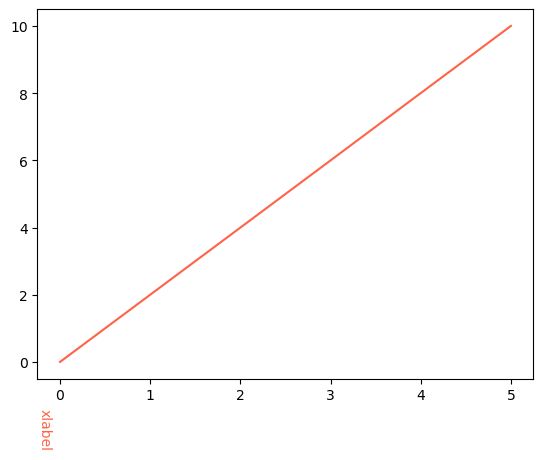

In [135]:
fig, ax = plt.subplots(num=1);
plt.plot(x, y, color='tomato');
plt.xlabel('xlabel', loc='left', 
           color='tomato', rotation=270);

### Labels and LaTeX (MathJax)

The labels also support some basic LaTeX in the form of MathJax. Commly used symbols include:

LaTeX Text (MathJax)

|description|LaTeX|output|
|---|---|---|
|math text|```$x$```|$x$|
|normal text|```$\text{x}$```|$\text{x}$|
|bold text|```$\textbf{x}$```|$\textbf{x}$|
|math text with dot|```$\dot{x}$```|$\dot{x}$|
|math text with double dot|```$\ddot{x}$```|$\ddot{x}$|
|math text with triple dot|```$\dddot{x}$```|$\dddot{x}$|
|math text with bar|```$\bar{x}$```|$\bar{x}$|
|math text with hat|```$\hat{x}$```|$\hat{x}$|
|math text with arrow vector|```$\vec{x}$```|$\vec{x}$|
|math text with tilde|```$\tilde{x}$```|$\tilde{x}$|
|math text with wide tilde|```$\widetilde{xx}$```|$\widetilde{xx}$|
|math text with check|```$\check{x}$```|$\check{x}$|
|math text with acute|```$\acute{x}$```|$\acute{x}$|
|math text with grave|```$\grave{x}$```|$\grave{x}$|
|math text with breve|```$\breve{x}$```|$\breve{x}$|
|subscript|```$x_{2}$```|$x_{2}$|
|superscript|```$x^{3}$```|$x^{3}$|
|subscript and superscript|```$x_{2}^{3}$```|$x_{2}^{3}$|
|square root|```$\sqrt{x}$```|$\sqrt{x}$|
|sin|```$\sin{x}$```|$\sin{x}$|
|cos|```$\cos{x}$```|$\cos{x}$|
|tan|```$\tan{x}$```|$\tan{x}$|
|log|```$\log{x}$```|$\log{x}$|
|exp|```$\exp{x}$```|$\exp{x}$|

LaTeX Mathematical Symbols (MathJax)

|description|LaTeX|output|
|---|---|---|
|equal to|```$=$```|$=$|
|equivalent to|```$\equiv$```|$\equiv$|
|not equal to|```$\ne$```|$\ne$|
|similar to|```$\sim$```|$\sim$|
|approximate to|```$\approx$```|$\approx$|
|tilde|```$\textasciitilde$```|$\textasciitilde$|
|approximately equal to|```$\cong$```|$\cong$|
|plus|```$+$```|$+$|
|minus|```$-$```|$-$|
|plus minus|```$\pm$```|$\pm$|
|minus plus|```$\mp$```|$\mp$|
|dash|```$\text{-}$```|$\text{-}$|
|circumflex|```$\textasciicircum$```|$\textasciicircum$|
|asterisk|```$\ast$```|$\ast$|
|star|```$\text{\*}$```|$\text{\*}$|
|times|```$\times$```|$\times$|
|centre dot|```$\cdot$```|$\cdot$|
|period|```$.$```|$.$|
|bullet|```$\bullet$```|$\bullet$|
|colon|```$\colon$```|$\colon$|
|centre dots|```$\cdots$```|$\cdots$|
|vertical dots|```$\vdots$```|$\vdots$|
|therefore|```$\therefore$```|$\therefore$|
|division slash|```$/$```|$/$|
|division sign|```$\div$```|$\div$|
|less than|```$<$```|$<$|
|less than or equal to|```$\leq$```|$\leq$|
|greater than|```$>$```|$>$|
|greater than or equal to|```$\geq$```|$\geq$|
|factorial|```$!$```|$!$|
|degree|```$\degree$```|$\degree$|
|infinity|```$\infty$```|$\infty$|
|proportional to|```$\propto$```|$\propto$|
|partial|```$\partial$```|$\partial$|
|hbar|```$\hbar$```|$\hbar$|
|union|```$\cup$```|$\cup$|
|intersection|```$\cap$```|$\cap$|
|emptyset|```$\emptyset$```|$\emptyset$|
|exists|```$\exists$```|$\exists$|
|in|```$\in$```|$\in$|
|not in|```$\notin$```|$\notin$|
|ni|```$\ni$```|$\ni$|
|left arrow|```$\leftarrow$```|$\leftarrow$|
|right arrow|```$\rightarrow$```|$\rightarrow$|
|left right arrow|```$\leftrightarrow$```|$\leftrightarrow$|
|up arrow|```$\uparrow$```|$\uparrow$|
|down arrow|```$\uparrow$```|$\downarrow$|
|up down arrow|```$\updownarrow$```|$\updownarrow$|

LaTeX Greek Letters (MathJax)

|description|LaTeX|output|
|---|---|---|
|alpha|```$\alpha$```|$\alpha$|
|beta|```$\beta$```|$\beta$|
|Gamma|```$\Gamma$```|$\Gamma$|
|gamma|```$\gamma$```|$\gamma$|
|Delta|```$\Delta$```|$\Delta$|
|delta|```$\delta$```|$\delta$|
|nabla|```$\nabla$```|$\nabla$|
|epsilon|```$\epsilon$```|$\epsilon$|
|epsilon|```$\varepsilon$```|$\varepsilon$|
|zeta|```$\zeta$```|$\zeta$|
|eta|```$\eta$```|$\eta$|
|kappa|```$\kappa$```|$\kappa$|
|Lambda|```$\Lamba$```|$\Lambda$|
|mu|```$\mu$```|$\mu$|
|Xi|```$\Xi$```|$\Xi$|
|xi|```$\xi$```|$\xi$|
|Pi|```$\Pi$```|$\Pi$|
|pi|```$\pi$```|$\pi$|
|rho|```$\rho$```|$\rho$|
|Sigma|```$\Sigma$```|$\Sigma$|
|sigma|```$\sigma$```|$\sigma$|
|sigma|```$\varsigma$```|$\varsigma$|
|tau|```$\tau$```|$\tau$|
|Upsilon|```$\Upsilon$```|$\Upsilon$|
|upsilon|```$\upsilon$```|$\upsilon$|
|Phi|```$\Phi$```|$\Phi$|
|phi|```$\phi$```|$\phi$|
|chi|```$\chi$```|$\chi$|
|Psi|```$\Psi$```|$\Psi$|
|psi|```$\psi$```|$\psi$|
|Omega|```$\Omega$```|$\Omega$|
|omega|```$\omega$```|$\omega$|

Note the Greek letters A, B, E, Z, H, I, i, K, M, N, O, o and P that are the same as Latin letters are therefore just represented using the Latin letters.

LaTeX Fractions (MathJax)

|description|LaTeX|output|
|---|---|---|
|inline fraction|```$\frac{a}{b}$```|$\frac{a}{b}$|

LaTeX Brackets (MathJax)

|description|LaTeX|output|
|---|---|---|
|inline fraction parenthesis|```$(\frac{a}{b})$```|$(\frac{a}{b})$|
|inline fraction square|```$[\frac{a}{b}]$```|$[\frac{a}{b}]$|
|inline fraction braces|```$\lbrace\frac{a}{b}\rbrace$```|$\lbrace\frac{a}{b} \rbrace$|

The ```{``` and ```}``` are reserved so ```\lbrace``` and ```\rbrace``` need to be used.

The strings are converted to raw strings and $ signs are added around LaTeX expressions:

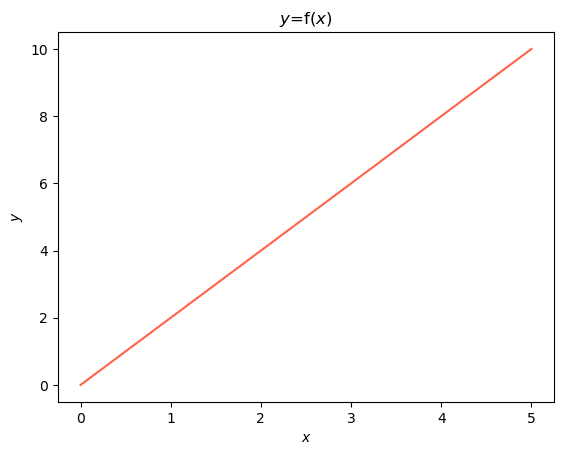

In [136]:
fig, ax = plt.subplots(num=1);
plt.plot(x, y, color='tomato');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.title(r'$y$=f($x$)');

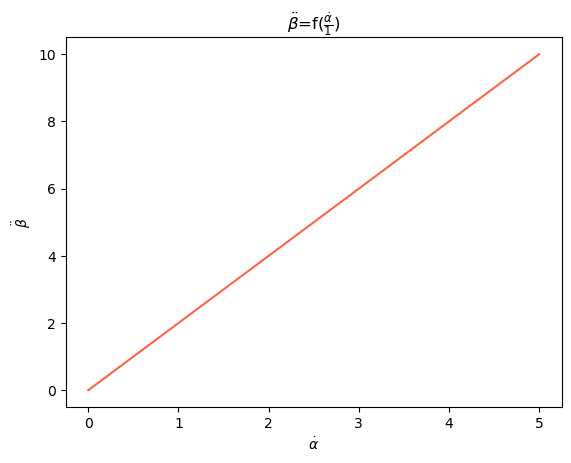

In [137]:
fig, ax = plt.subplots(num=1);
plt.plot(x, y, color='tomato');
plt.xlabel(r'$\dot{\alpha}$');
plt.ylabel(r'$\ddot{\beta}$');
plt.title(r'$\ddot{\beta}$=f$(\frac{\dot{\alpha}}{1})$');

### Annotations

Annotations can be added using the Axes method annotate or pyplot function annotate:

In [138]:
? ax.annotate

Signature:
 ax.annotate(
    text,
    xy,
    xytext=None,
    xycoords='data',
    textcoords=None,
    arrowprops=None,
    annotation_clip=None,
    **kwargs,
)
Docstring:
Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
text : str
    The text of the annotation.

xy : (float, float)
    The point *(x, y)* to annotate. The coordinate system is determined
    by *xycoords*.

xytext : (float, float), default: *xy*
    The position *(x, y)* to place the text at. The coordinate system
    is determined by *textcoords*.

xycoords : single or two-tuple of str or `.Artist` or `.Transform` or callable, default: 'data'

    The coordinate system that *xy* is given in. The following types
    of values are supported:

    - One of the following strings:

 

The annotation takes in a number of keyword input arguments. 

In the simplest case, text is the text to be annotated and xy is a tuple of the co-ordinates using the units specified in xycoords.

More generally a specific data point at xy is annotated using text at xytext and an arrow is drawn from xytext to xy. The keyword argument arrowprops is a dictionary of arrow properties, the dictionary is used to seperate these properties from the text properties.

Text(4, 6, 'customarrow')

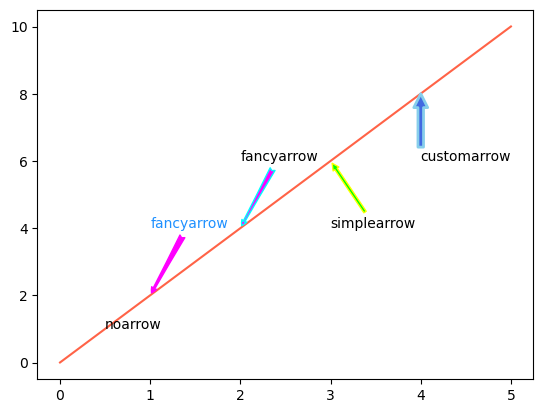

In [139]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='tomato');
ax.annotate(text='noarrow', xy=(0.5, 1), xycoords='data')
ax.annotate(text='fancyarrow', xy=(1, 2), xytext=(1, 4), xycoords='data', 
            color='dodgerblue',
            arrowprops={'color': 'magenta',
                        'arrowstyle': 'fancy'})
ax.annotate(text='fancyarrow', xy=(2, 4), xytext=(2, 6), xycoords='data', 
            arrowprops={'facecolor': 'magenta',
                        'edgecolor': 'cyan',
                        'arrowstyle': 'fancy'})
ax.annotate(text='simplearrow', xy=(3, 6), xytext=(3, 4), xycoords='data', 
            arrowprops={'facecolor': 'lime',
                        'edgecolor': 'yellow',
                        'arrowstyle': 'simple'})
ax.annotate(text='customarrow', xy=(4, 8), xytext=(4, 6), xycoords='data', 
            arrowprops={'facecolor': 'royalblue',
                        'edgecolor': 'skyblue',
                        'headlength': 10,
                        'headwidth': 10,
                        'linewidth': 2})

## Axes Limits

The Axes limits are automatically determined from the data:

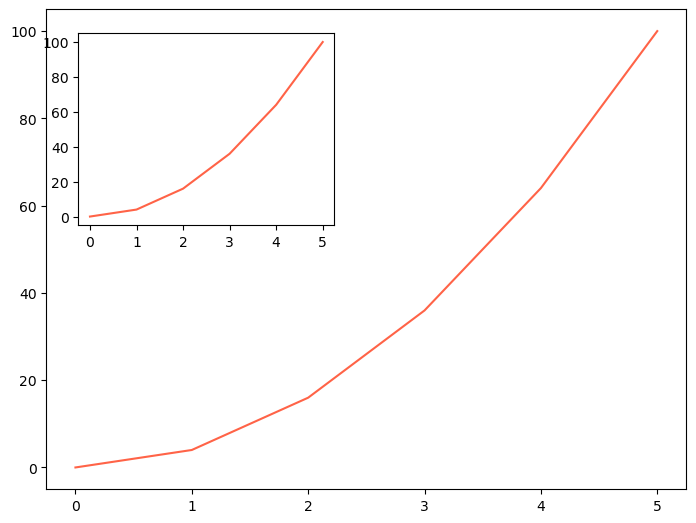

In [140]:
fig = plt.Figure()
ax1 = fig.add_axes(rect=(0, 0, 1, 1))
ax1.plot(x, y**2, color='tomato')
ax2 = fig.add_axes(rect=(0.05, 0.55, 0.4, 0.4))
ax2.plot(x, y**2, color='tomato')

fig

Sometimes it is desirable to change the Axes limits to zoom in or out of a region. This is done by the axes method set_xlim or analogous pyplot function xlim for the x-axis or set_ylim and ylim for the y-axis:

In [141]:
? ax1.set_xlim

Signature:
 ax1.set_xlim(
    left=None,
    right=None,
    *,
    emit=True,
    auto=False,
    xmin=None,
    xmax=None,
)
Docstring:
Set the x-axis view limits.

Parameters
----------
left : float, optional
    The left xlim in data coordinates. Passing *None* leaves the
    limit unchanged.

    The left and right xlims may also be passed as the tuple
    (*left*, *right*) as the first positional argument (or as
    the *left* keyword argument).

    .. ACCEPTS: (bottom: float, top: float)

right : float, optional
    The right xlim in data coordinates. Passing *None* leaves the
    limit unchanged.

emit : bool, default: True
    Whether to notify observers of limit change.

auto : bool or None, default: False
    Whether to turn on autoscaling of the x-axis. True turns on,
    False turns off, None leaves unchanged.

xmin, xmax : float, optional
    They are equivalent to left and right respectively, and it is an
    error to pass both *xmin* and *left* or *xmax* and *right*.



The limits are normally set by using the keyword arguments left and right for x or bottom and top for y. left and right have the alias xmin and xmax. Likewise bottom and top have the alias ymin and ymax. auto can be assigned to a boolean which will rescale the axes to new data if new data is added to the Axes:

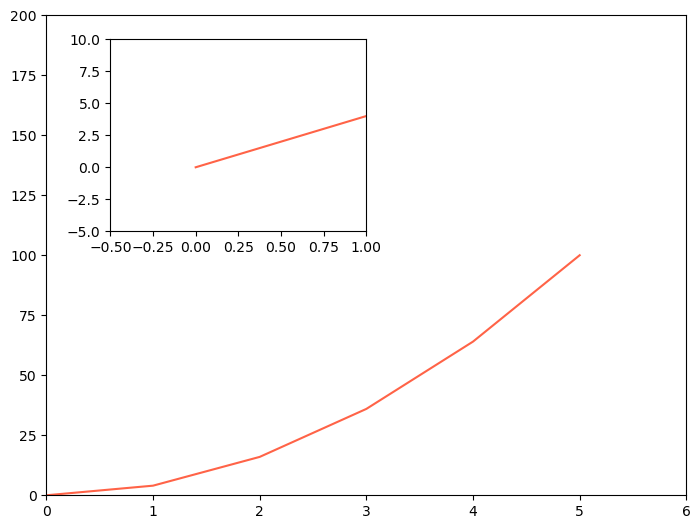

In [142]:
fig = plt.Figure()
ax1 = fig.add_axes(rect=(0, 0, 1, 1))
ax1.plot(x, y**2, color='tomato')

ax1.set_xlim(left=0, right=6, auto=False)
ax1.set_ylim(bottom=0, top=200, auto=False)

ax2 = fig.add_axes(rect=(0.1, 0.55, 0.4, 0.4))
ax2.plot(x, y**2, color='tomato')

ax2.set_xlim(left=-0.5, right=1, auto=False)
ax2.set_ylim(bottom=-5, top=10, auto=False)

fig

If both limits are provided, they can also be provided positionally using a tuple. the keyword argument should be supplied if only one of the limits is changing:

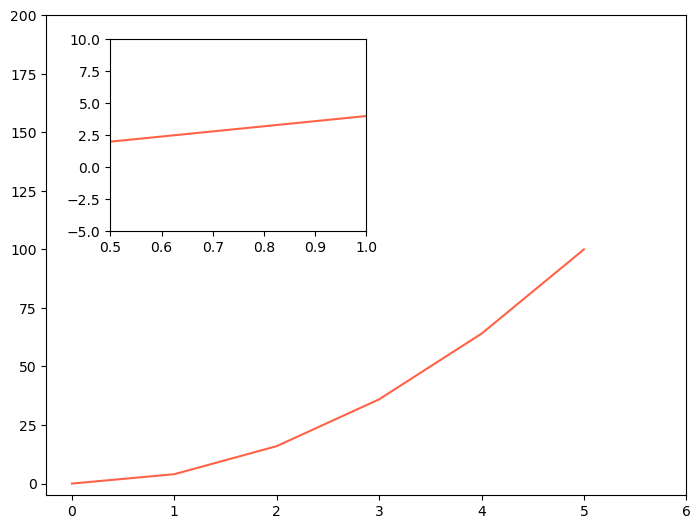

In [143]:
fig = plt.Figure()
ax1 = fig.add_axes(rect=(0, 0, 1, 1))
ax1.plot(x, y**2, color='tomato')

ax1.set_xlim(right=6, auto=False)
ax1.set_ylim(top=200, auto=False)

ax2 = fig.add_axes(rect=(0.1, 0.55, 0.4, 0.4))
ax2.plot(x, y**2, color='tomato')

ax2.set_xlim((0.5, 1), auto=False)
ax2.set_ylim((-5, 10), auto=False)

fig

## Axes Scale

When a value has a non-linear dependence it is sometimes insightful to view it on a logarithmic scale. This can be done using the axes methods set_xscale and set_yscale respectively which also have the pyplot functions xscale and yscale:

In [144]:
? ax2.set_yscale

Signature:  ax2.set_yscale(value, **kwargs)
Docstring:
Set the yaxis' scale.

Parameters
----------
value : {"linear", "log", "symlog", "logit", ...} or `.ScaleBase`
    The axis scale type to apply.

**kwargs
    Different keyword arguments are accepted, depending on the scale.
    See the respective class keyword arguments:

    - `matplotlib.scale.LinearScale`
    - `matplotlib.scale.LogScale`
    - `matplotlib.scale.SymmetricalLogScale`
    - `matplotlib.scale.LogitScale`
    - `matplotlib.scale.FuncScale`

Notes
-----
By default, Matplotlib supports the above-mentioned scales.
Additionally, custom scales may be registered using
`matplotlib.scale.register_scale`. These scales can then also
be used here.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\site-packages\matplotlib\axes\_base.py
Type:      method

The log of 0 is -∞:

In [145]:
# np.log(0)

And the log of a negative number is not a number:

In [146]:
# np.log(-1)

Therefore the bottom limit is normally set to 1 when using a log scale:

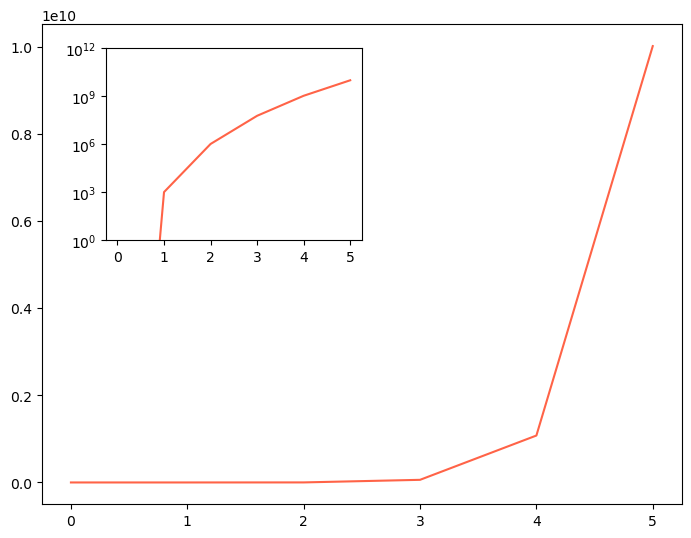

In [147]:
fig = plt.Figure()
ax1 = fig.add_axes(rect=(0, 0, 1, 1))
ax1.plot(x, y**10, color='tomato')
ax2 = fig.add_axes(rect=(0.1, 0.55, 0.4, 0.4))
ax2.plot(x, y**10, color='tomato')

ax2.set_yscale('log')
ax2.set_ylim(bottom=1)
fig

## Line Plot

Previously a single line plot was created using the plot function and returned to the instance name chart:

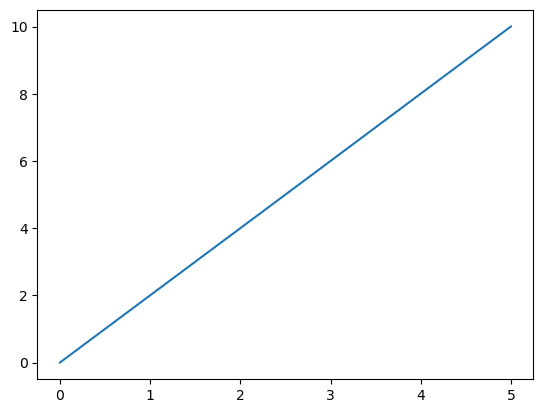

In [148]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y);

chart was seen to be a list of Line2D objects and in this case a single element list:

In [149]:
chart

The method plot can take it multiple positional input arguments:

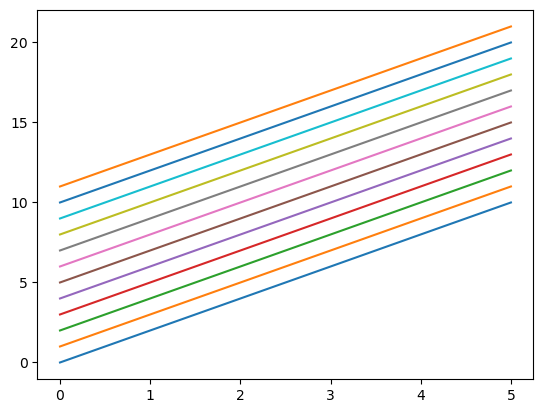

In [150]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11);

## Colors

Notice that each line has its own color until the 10th line is reached and the colors then repeat. This is because the default colors used are called TABLEAU_COLORS and there are 10 colors:

In [151]:
from matplotlib.colors import TABLEAU_COLORS

In [152]:
TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

Notice that TABLEAU_colors is a dictionary. The keys are strings and the values are hexadecimal strings.

Hexadecimal strings have the form:

```
#rrggbb
```

The human eye has short wavelength (blue sensitive), medium wavelength (green sensitive) and long wavelength (red sensitive) receptors and the brain maps a color ratio from these receptors to what a human perceives as a color.

Each pixel in screen uses a red, green and blue LED known as a rgb LED to perform color mixing. Each channel spans over 1 byte which recall can be represented using 2 hexadecimal characters.

matplotlib has another color dictionary called CSS4_COLORS, the key for each color is a string that corresponds to the English name of the color and the value is the corresponding hexadecimal value:

In [153]:
from matplotlib.colors import CSS4_COLORS

In [154]:
CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

The key can be used to access the color:

In [155]:
CSS4_COLORS['royalblue']

'#4169E1'

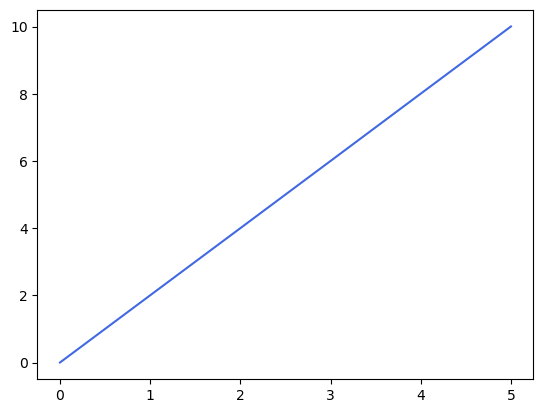

In [156]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color=CSS4_COLORS['royalblue']);

However the keys from CSS4_COLORS are recognised by color related input arguments of matplotlib functions and normally used directly:

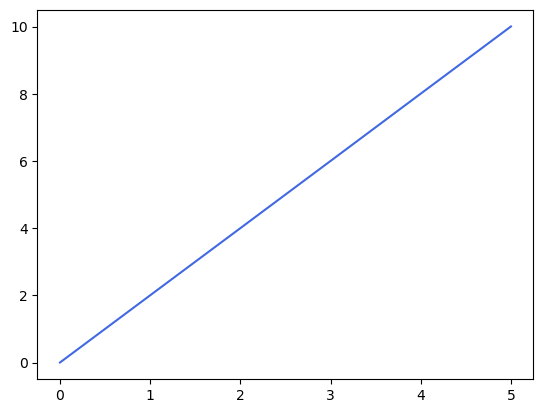

In [157]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue');

Notice that if color is provided as a keyword input argument, in a multiline plot that all lines will have the same color:

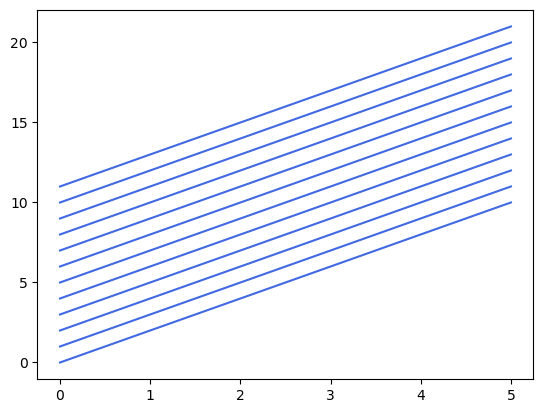

In [158]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11,
                color='royalblue');

Instead these can be provided positionally for each line:

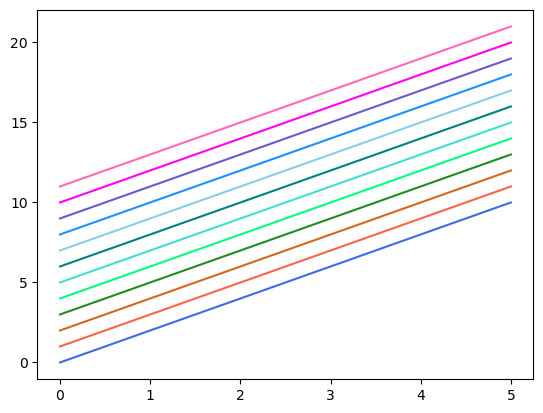

In [159]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 'royalblue', 
                x, y+1, 'tomato',
                x, y+2, 'chocolate',
                x, y+3, 'forestgreen',
                x, y+4, 'springgreen',
                x, y+5, 'turquoise',
                x, y+6, 'teal',
                x, y+7, 'skyblue',
                x, y+8, 'dodgerblue',
                x, y+9, 'slateblue',
                x, y+10, 'fuchsia',
                x, y+11, 'hotpink');

## LineWidth

The linewidth can be changed using the keyword argument linewidth:

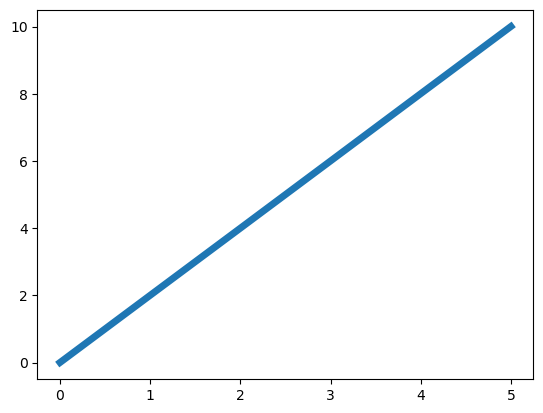

In [160]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, linewidth=5)

This has the alias lw:

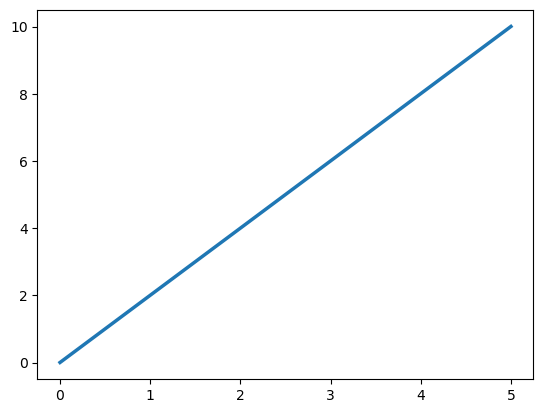

In [161]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, lw=2.5)

When linewidth is provided as a keyword input argument, in a multiline plot that all lines will have the same width:

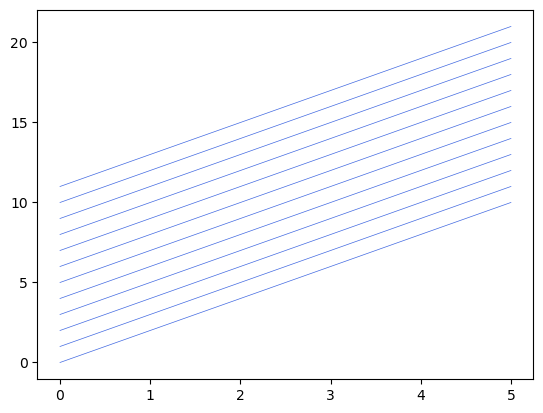

In [162]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11,
                color='royalblue', linewidth=0.5);

When a high level of customisation is desired, each line is normally seperately plotted. Recall the return value for ax.plot is a list of lines, in this case a single line. An empty list chart can be made and each plot appended:

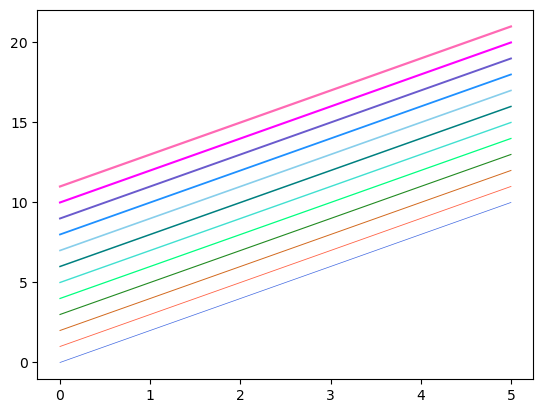

In [163]:
fig, ax = plt.subplots(num=1);
chart = []
chart.append(ax.plot(x, y, color='royalblue', linewidth=0.5)[0])
chart.append(ax.plot(x, y+1, color='tomato', linewidth=0.6)[0])
chart.append(ax.plot(x, y+2, color='chocolate', linewidth=0.7)[0])
chart.append(ax.plot(x, y+3, color='forestgreen', linewidth=0.8)[0])
chart.append(ax.plot(x, y+4, color='springgreen', linewidth=0.9)[0])
chart.append(ax.plot(x, y+5, color='turquoise', linewidth=1.0)[0])
chart.append(ax.plot(x, y+6, color='teal', linewidth=1.1)[0])
chart.append(ax.plot(x, y+7, color='skyblue', linewidth=1.2)[0])
chart.append(ax.plot(x, y+8, color='dodgerblue', linewidth=1.3)[0])
chart.append(ax.plot(x, y+9, color='slateblue', linewidth=1.4)[0])
chart.append(ax.plot(x, y+10, color='fuchsia', linewidth=1.5)[0])
chart.append(ax.plot(x, y+11, color='hotpink', linewidth=1.6)[0])

The list chart contaisn the 12 lines:

In [164]:
chart

The ax attribute lines also gives these:

In [165]:
ax.lines

<Axes.ArtistList of 12 lines>

This is seen more clearly if it is cast to a list:

In [166]:
list(ax.lines)

This means the more simpler syntax can be used:

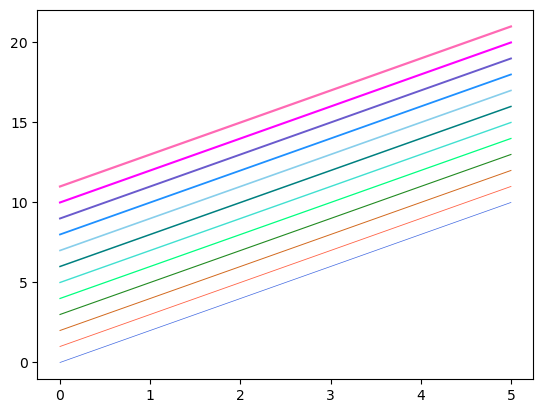

In [167]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', linewidth=0.5)
ax.plot(x, y+1, color='tomato', linewidth=0.6)
ax.plot(x, y+2, color='chocolate', linewidth=0.7)
ax.plot(x, y+3, color='forestgreen', linewidth=0.8)
ax.plot(x, y+4, color='springgreen', linewidth=0.9)
ax.plot(x, y+5, color='turquoise', linewidth=1.0)
ax.plot(x, y+6, color='teal', linewidth=1.1)
ax.plot(x, y+7, color='skyblue', linewidth=1.2)
ax.plot(x, y+8, color='dodgerblue', linewidth=1.3)
ax.plot(x, y+9, color='slateblue', linewidth=1.4)
ax.plot(x, y+10, color='fuchsia', linewidth=1.5)
ax.plot(x, y+11, color='hotpink', linewidth=1.6)

## Line Style

The linestyle can be changed using the keyword input argument linestyle:

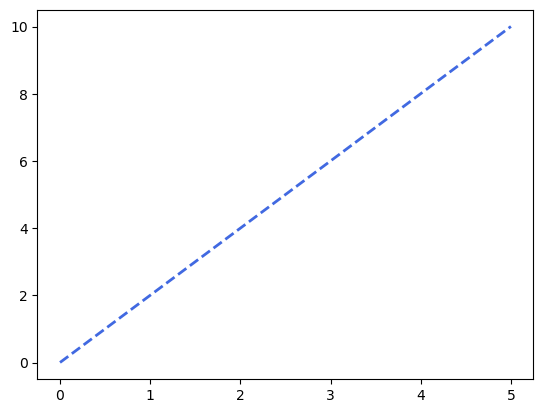

In [168]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', linestyle='dashed', linewidth=2.0)

This has the abbreviation ls:

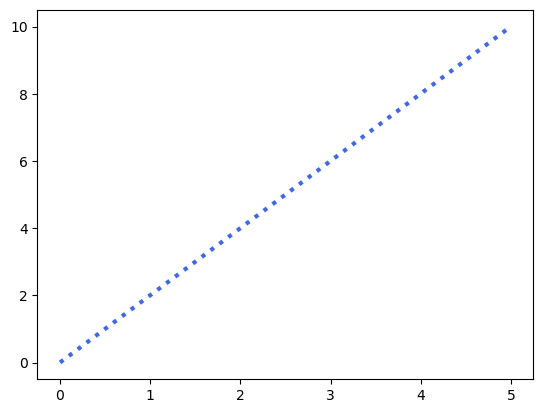

In [169]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', ls='dotted', lw=3.0)

The most common linestyles have a linestyle string and abbreviated linestyle string. Other line styles can be specified usign a tuple:

|description|linestyle string|line style string abbreviation|line style tuple|
|---|---|---|---|
|solid|'solid'|'-'||
|dashed|'dashed'|'--'|(0, (5, 5)))|
|dotted|'dotted'|':'|(0, (1, 1)))|
|dashdot|'dashdot|'-.'||
|loosely dotted|||(0, (1, 10)))|
|densely dotted|||(0, (1, 1)))|
|long dash with offset|||(5, (10, 3)))|
|loosely dashed|||(0, (5, 10)))|
|densely dashed|||(0, (5, 1)))|
|loosely dashdotted|||(0, (3, 10, 1, 10)))|
|dashdotted|||(0, (3, 5, 1, 5)))|
|densely dashdotted|||(0, (3, 1, 1, 1)))|
|dashdotdotted|||(0, (3, 5, 1, 5, 1, 5)))|
|loosely dashdotdotted|||(0, (3, 10, 1, 10, 1, 10)))|
|densely dashdotdotted|||(0, (3, 1, 1, 1, 1, 1)))|


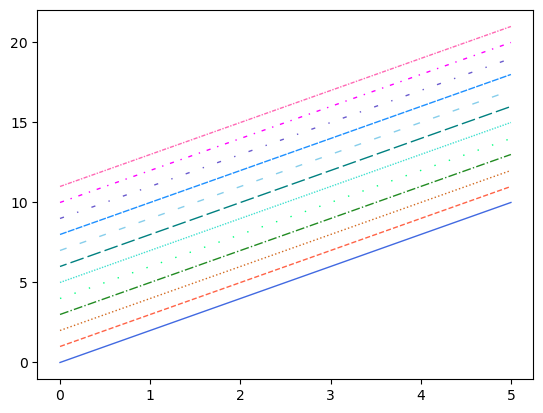

In [170]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', linewidth=1.0, linestyle='solid')
ax.plot(x, y+1, color='tomato', linewidth=1.0, linestyle='dashed')
ax.plot(x, y+2, color='chocolate', linewidth=1.0, linestyle='dotted')
ax.plot(x, y+3, color='forestgreen', linewidth=1.0, linestyle='dashdot')
ax.plot(x, y+4, color='springgreen', linewidth=1.0, linestyle=(0, (1, 10)))
ax.plot(x, y+5, color='turquoise', linewidth=1.0, linestyle=(0, (1, 1)))
ax.plot(x, y+6, color='teal', linewidth=1.0, linestyle=(5, (10, 3)))
ax.plot(x, y+7, color='skyblue', linewidth=1.0, linestyle=(0, (5, 10)))
ax.plot(x, y+8, color='dodgerblue', linewidth=1.0, linestyle=(0, (5, 1)))
ax.plot(x, y+9, color='slateblue', linewidth=1.0, linestyle=(0, (3, 10, 1, 10)))
ax.plot(x, y+10, color='fuchsia', linewidth=1.0, linestyle=(0, (3, 5, 1, 5)))
ax.plot(x, y+11, color='hotpink', linewidth=1.0, linestyle=(0, (3, 1, 1, 1)))

## Markers

In a line plot, markers are not added by default, they can be added using the keyword marker:

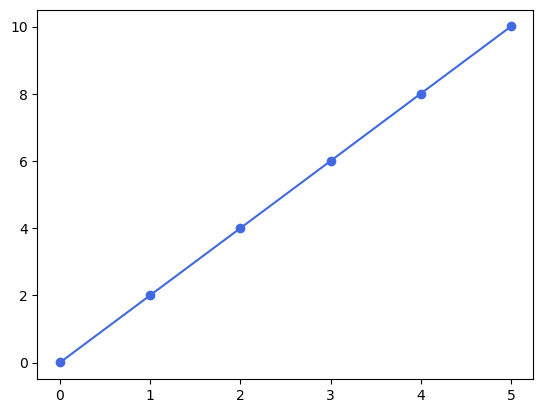

In [171]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue', marker='o')

The following are commonly used markers:

|Marker Description|String|Integer or None|
|---|---|---|
|nothing|```''```|```None```|
|point|```'.'```||
|pixel|```','```||
|circle|```'o'```||
|triangle_down|```'v'```||
|triangle_up|```'^'```||
|triangle_left|```'<'```||
|triangle_right|```'>'```||
|tri_down|```'1'```||
|tri_up|```'2'```||
|tri_left|```'3'```||
|tri_right|```'4'```||
|octagon|```'8'```||
|square|```'s'```||
|pentagon|```'p'```||
|plus_filled|```'P'```||
|star|```'*'```||
|hexagon1|```'h'```||
|hexagon2|```'H'```||
|plus|```'+'```||
|x|```'x'```||
|X|```'X'```||
|vline|```'\|'```||
|hline|```'_'```||
|tickleft||```0```|
|tickright||```1```|
|caretleft||```2```|
|caretright||```3```|
|caretup||```4```|
|caretdown||```5```|
|caretleftbase||```6```|
|caretrightbase||```7```|
|caretupbase||```8```|
|caretdownbase||```9```|

Once again specification of a keyword input argument, in a multiline plot will apply that option to all lines:

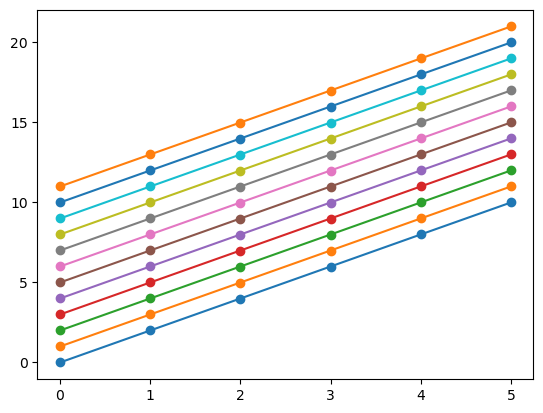

In [172]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11,
                marker='o');

The marker can be specified individually as a positional input argument:

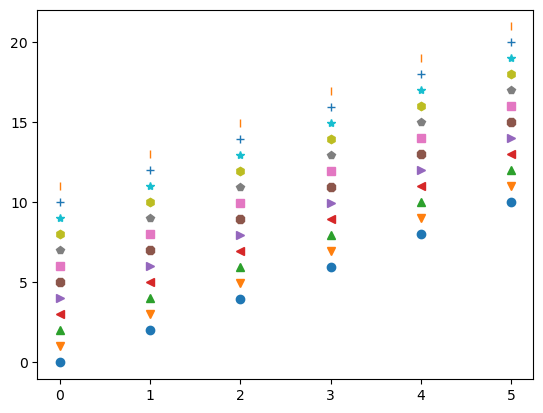

In [173]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 'o', 
                x, y+1, 'v',
                x, y+2, '^',
                x, y+3, '<',
                x, y+4, '>',
                x, y+5, '8',
                x, y+6, 's',
                x, y+7, 'p',
                x, y+8, 'h',
                x, y+9, '*',
                x, y+10, '+',
                x, y+11, '|');

There are a number of marker related settings such as markersize, markeredgewidth, markeredgecolor, markerfacecolor and markerfacecoloralt which is only relevent if a fillstyle is selected:

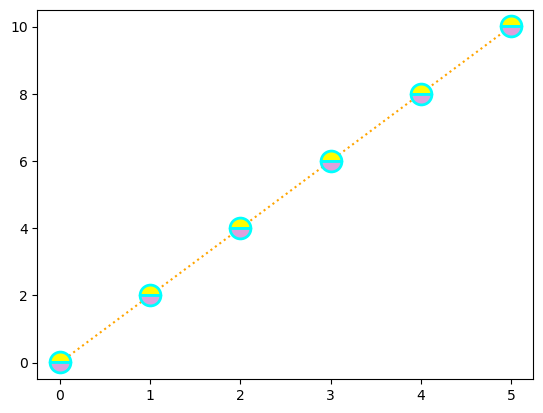

In [174]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='orange', linestyle=':',
        marker='o', markersize=15,
        markeredgewidth=2, markeredgecolor='cyan',
        markerfacecolor='yellow',
        fillstyle='top', markerfacecoloralt='plum')

These have the following abbreviated alias:

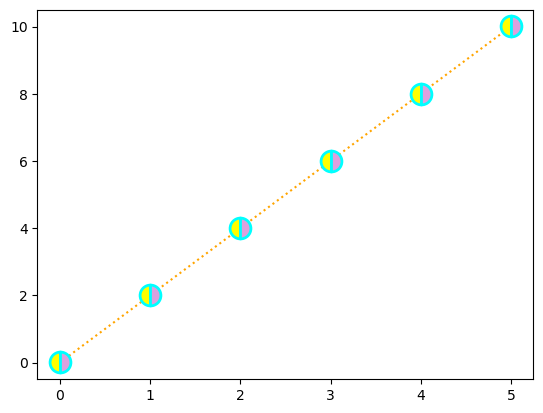

In [175]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='orange', ls='dotted',
        marker='o', ms=15,
        mew=2, mec='cyan',
        mfc='yellow',
        fillstyle='left', mfcalt='plum')

## Draw Style

The input argument drawstyle determines the connection between datapoints, the default style draws a line between them, however it is also possible to connect them using a step. The step can be pre, mid or post:

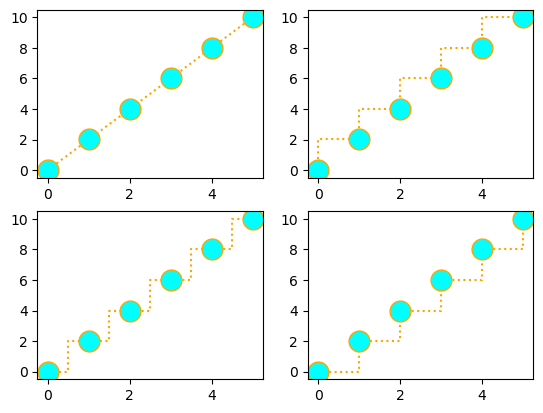

In [205]:
fig, ax = plt.subplots(nrows=2, ncols=2, num=1);
ax[0, 0].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='default',
              marker='o', ms=15,
              mfc='cyan')
ax[0, 1].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='steps-pre',
              marker='o', ms=15,
              mfc='cyan')
ax[1, 0].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='steps-mid',
              marker='o', ms=15,
              mfc='cyan')
ax[1, 1].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='steps-post',
              marker='o', ms=15,
              mfc='cyan')

## Label and Legend

A label can be added for each line and a legend produced:

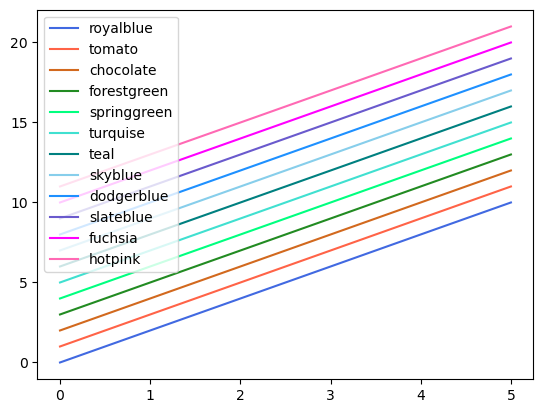

In [176]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend()

In [177]:
? ax.legend

Signature:  ax.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for all
    artis

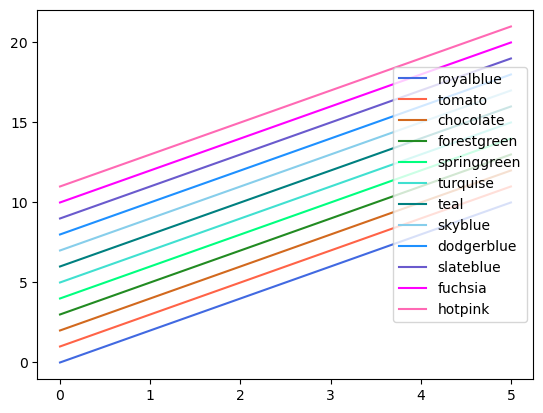

In [178]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(loc='center right')

The black box enclosing the axis is known as the bbox. The bbox_to_anchor input argument will anchor the legend to the bbox using a tuple of the form (x, y), x is the normalised ratio of the bbox x and y is the normalised ratio of the bbox y. A bbox_to_anchor=(0.3, 0.8) for example moves the bottom left corner of the legend to the normalised position specified:

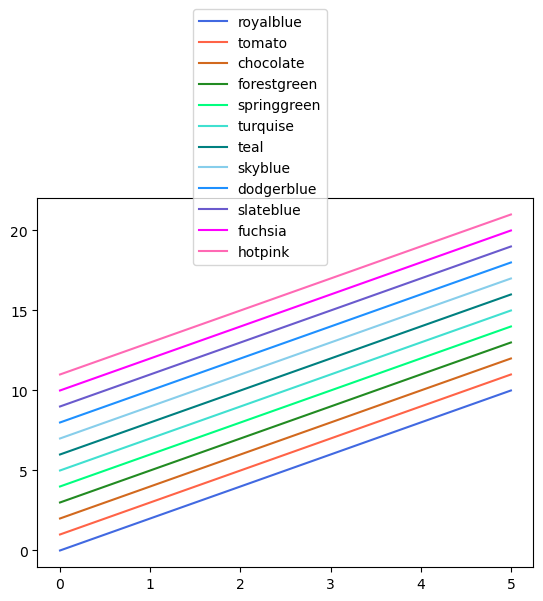

In [179]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(0.3, 0.8))

A bbox_to_anchor=(1.0, 0) for example moves the top right corner of the legend to the normalised position specified:

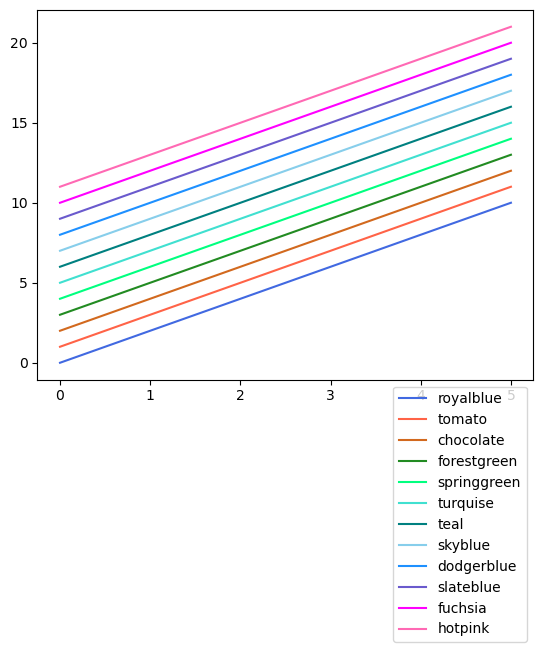

In [180]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(1.0, 0))

A bbox_to_anchor=(1.0, 0.5) for example moves the top left corner of the legend to the normalised position specified:

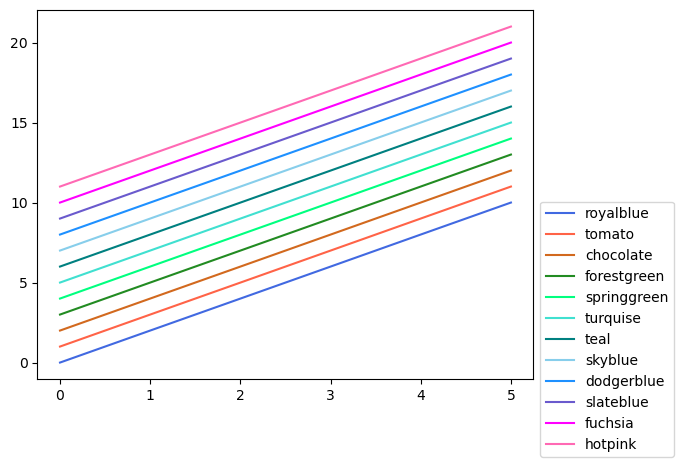

In [181]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(1.0, 0.5))

A bbox_to_anchor=(1.0, 0.9) for example moves the top left corner of the legend to the normalised position specified:

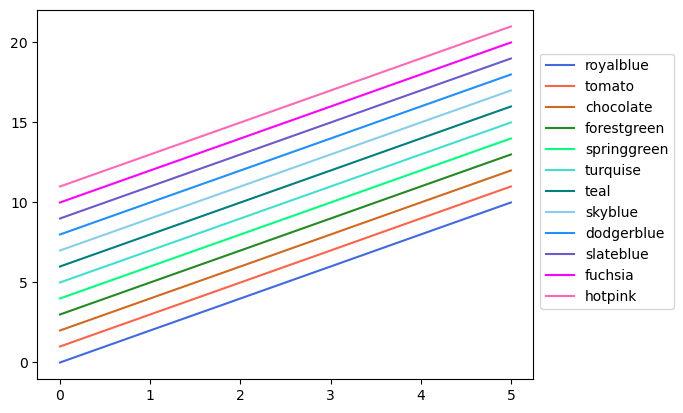

In [182]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(1.0, 0.90))

If subplots are created, the ax legend method can be used on each axis:

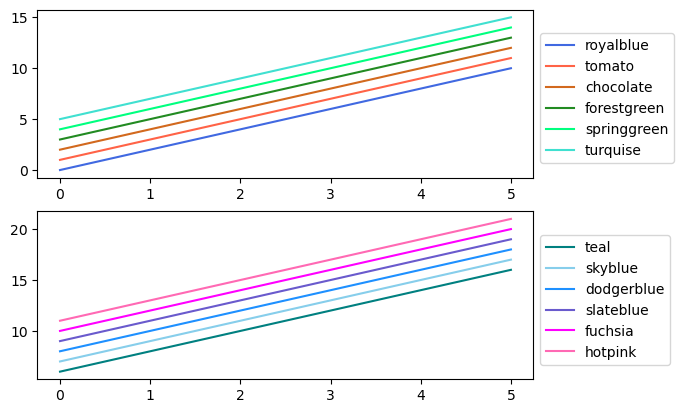

In [183]:
fig, ax = plt.subplots(nrows=2, ncols=1, num=1);
ax[0].plot(x, y, color='royalblue', label='royalblue')
ax[0].plot(x, y+1, color='tomato', label='tomato')
ax[0].plot(x, y+2, color='chocolate', label='chocolate')
ax[0].plot(x, y+3, color='forestgreen', label='forestgreen')
ax[0].plot(x, y+4, color='springgreen', label='springgreen')
ax[0].plot(x, y+5, color='turquoise', label='turquise')
ax[1].plot(x, y+6, color='teal', label='teal')
ax[1].plot(x, y+7, color='skyblue', label='skyblue')
ax[1].plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax[1].plot(x, y+9, color='slateblue', label='slateblue')
ax[1].plot(x, y+10, color='fuchsia', label='fuchsia')
ax[1].plot(x, y+11, color='hotpink', label='hotpink')
ax[0].legend(bbox_to_anchor=(1.0, 0.90))
ax[1].legend(bbox_to_anchor=(1.0, 0.90))

The figure ax method can also be used which combines the legends together. The bbox for the figure can be conceptualisaed as an invisible bbox around all the subplots on the figure, for example a bbox_to_anchor=(0.5, 0.5) moves the top right of the legend to the following position:

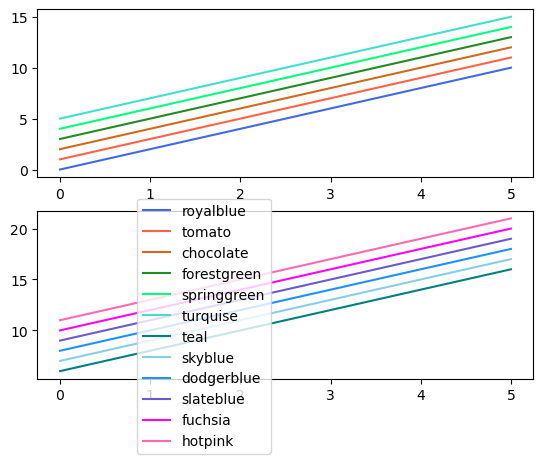

In [184]:
fig, ax = plt.subplots(nrows=2, ncols=1, num=1);
ax[0].plot(x, y, color='royalblue', label='royalblue')
ax[0].plot(x, y+1, color='tomato', label='tomato')
ax[0].plot(x, y+2, color='chocolate', label='chocolate')
ax[0].plot(x, y+3, color='forestgreen', label='forestgreen')
ax[0].plot(x, y+4, color='springgreen', label='springgreen')
ax[0].plot(x, y+5, color='turquoise', label='turquise')
ax[1].plot(x, y+6, color='teal', label='teal')
ax[1].plot(x, y+7, color='skyblue', label='skyblue')
ax[1].plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax[1].plot(x, y+9, color='slateblue', label='slateblue')
ax[1].plot(x, y+10, color='fuchsia', label='fuchsia')
ax[1].plot(x, y+11, color='hotpink', label='hotpink')
fig.legend(bbox_to_anchor=(0.5, 0.5))

An x value greater than 1 is often used to move this outside the bbox:

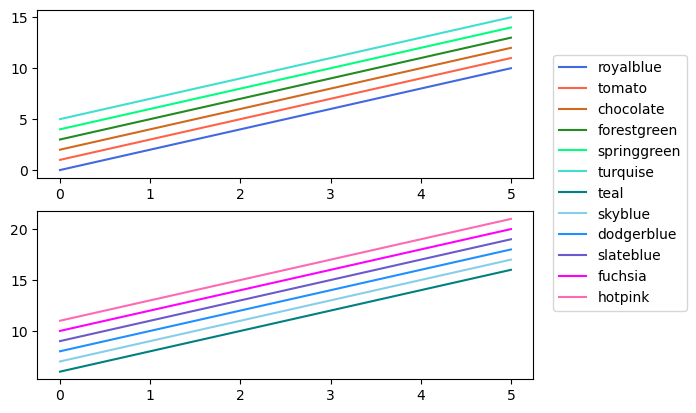

In [185]:
fig, ax = plt.subplots(nrows=2, ncols=1, num=1);
ax[0].plot(x, y, color='royalblue', label='royalblue')
ax[0].plot(x, y+1, color='tomato', label='tomato')
ax[0].plot(x, y+2, color='chocolate', label='chocolate')
ax[0].plot(x, y+3, color='forestgreen', label='forestgreen')
ax[0].plot(x, y+4, color='springgreen', label='springgreen')
ax[0].plot(x, y+5, color='turquoise', label='turquise')
ax[1].plot(x, y+6, color='teal', label='teal')
ax[1].plot(x, y+7, color='skyblue', label='skyblue')
ax[1].plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax[1].plot(x, y+9, color='slateblue', label='slateblue')
ax[1].plot(x, y+10, color='fuchsia', label='fuchsia')
ax[1].plot(x, y+11, color='hotpink', label='hotpink')
fig.legend(bbox_to_anchor=(1.15, 0.80))

Note the pyplot function legend is equivalent to the Axes method legend.

## Grid

gridlines are not shown by default:

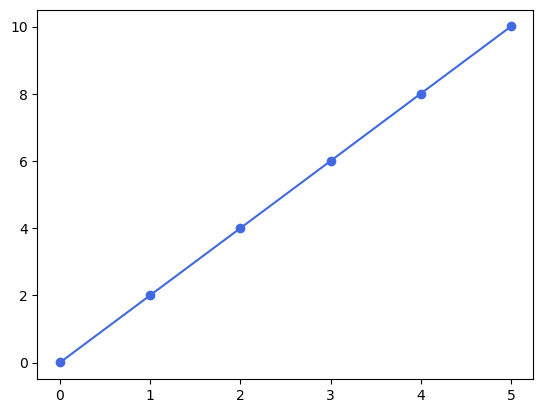

In [186]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue', marker='o')

Major gridlines can be added using the Axes method grid which by default turns major gridlines visible making them 'grey':

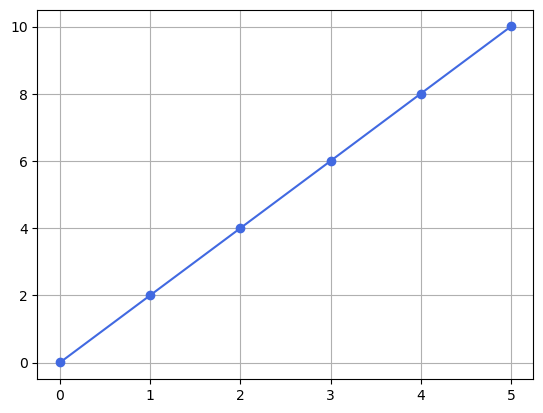

In [187]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue', marker='o')
ax.grid()

minorticks can also be added:

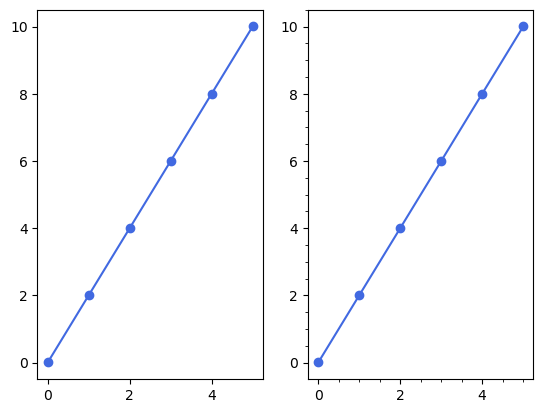

In [188]:
fig, ax = plt.subplots(nrows=1, ncols=2, num=1);
ax[0].plot(x, y, color='royalblue', marker='o')
ax[1].plot(x, y, color='royalblue', marker='o')
ax[1].minorticks_on()

keyword arguments can be added to grid to specify which gridline and axis are modified. The line specific keyword input arguments are consistent with the line plot:

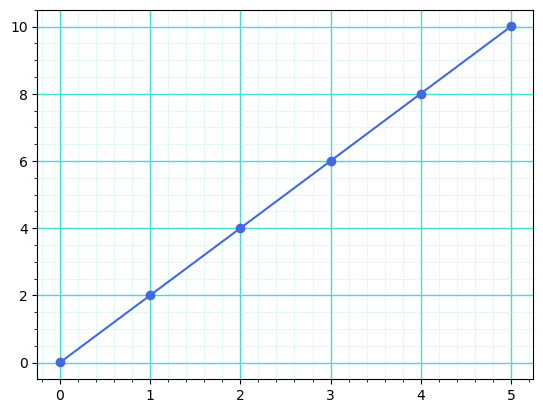

In [189]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, color='royalblue', marker='o')
ax.minorticks_on()
ax.grid(which='major', axis='both', visible=True, color='turquoise', linewidth=1, linestyle='solid')
ax.grid(which='minor', axis='both', visible=True, color='paleturquoise', linewidth=0.5, linestyle=(0, (1, 1)))

## Get Properties and Set Properties

Supposing the multi-line plot is created:

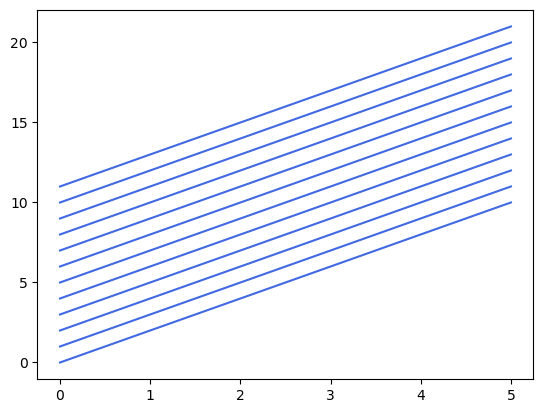

In [190]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, 
        x, y+1,
        x, y+2,
        x, y+3, 
        x, y+4,
        x, y+5,
        x, y+6,
        x, y+7,
        x, y+8,
        x, y+9,
        x, y+10,
        x, y+11,
        color='royalblue');

The Axes lines attribute contains all these lines:

In [191]:
ax.lines

<Axes.ArtistList of 12 lines>

The pyplot function get properties getp can be used to examine the properties of all the lines using:

In [192]:
plt.getp(ax.lines)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    bbox = Bbox(x0=0.0, y0=0.001, x1=5.0, y1=10.001)
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = royalblue
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0, 1, 2, 3, 4, 5]), array([1.0000e-03, 2.0...
    drawstyle or ds = default
    figure = Figure(640x480)
    fillstyle = full
    gapcolor = None
    gid = None
    in_layout = True
    label = _child0
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = royalblue
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = royalblue
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    mouseover = False
    path = Path(array([[0.0000e+00, 1.0000e-03],        [1.00...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = F

Of a line using:

In [193]:
plt.getp(ax.lines[0])

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    bbox = Bbox(x0=0.0, y0=0.001, x1=5.0, y1=10.001)
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = royalblue
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0, 1, 2, 3, 4, 5]), array([1.0000e-03, 2.0...
    drawstyle or ds = default
    figure = Figure(640x480)
    fillstyle = full
    gapcolor = None
    gid = None
    in_layout = True
    label = _child0
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = royalblue
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = royalblue
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    mouseover = False
    path = Path(array([[0.0000e+00, 1.0000e-03],        [1.00...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = F

This function can also be used on the Axes:

In [194]:
plt.getp(ax)

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes_locator = None
    axisbelow = line
    box_aspect = None
    children = [<matplotlib.lines.Line2D object at 0x0000023AAA9B...
    clip_box = None
    clip_on = True
    clip_path = None
    data_ratio = 4.199999999999999
    default_bbox_extra_artists = [<matplotlib.spines.Spine object at 0x0000023AAA90...
    facecolor or fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(640x480)
    frame_on = True
    gid = None
    gridspec = GridSpec(1, 1)
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 12 Line2D objects>
    mouseover = False
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=...
    r

And the Figure:

In [195]:
plt.getp(fig)

    agg_filter = None
    alpha = None
    animated = False
    axes = [<Axes: >]
    children = [<matplotlib.patches.Rectangle object at 0x0000023...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (None, None, None, None)
    default_bbox_extra_artists = [<Axes: >, <matplotlib.spines.Spine object at 0x00...
    dpi = 100.0
    edgecolor = (1.0, 1.0, 1.0, 1.0)
    facecolor = (1.0, 1.0, 1.0, 1.0)
    figheight = 4.8
    figure = Figure(640x480)
    figwidth = 6.4
    frameon = True
    gid = None
    in_layout = True
    label = 
    layout_engine = None
    linewidth = 0.0
    mouseover = False
    path_effects = []
    picker = None
    rasterized = False
    size_inches = [6.4 4.8]
    sketch_params = None
    snap = None
    tight_layout = False
    tightbbox = TransformedBbox(     Bbox(x0=52.52777777777777, y0...
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url 

The related function set properties can be used on the same matplotlib objects alongside the parameters above in the form of keyword input arguments. With the default backend of inline, all the commands used for a single plot must be input in the same cell, this includes setting properties: 

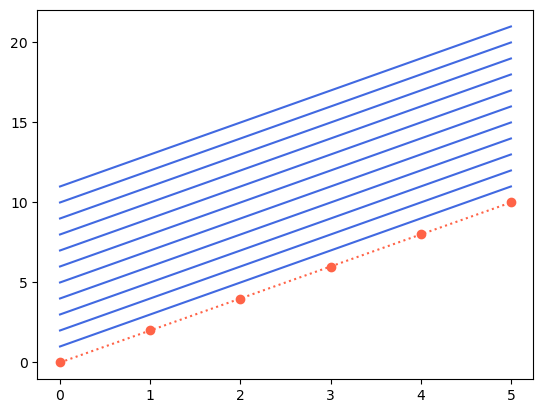

In [196]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, 
        x, y+1,
        x, y+2,
        x, y+3, 
        x, y+4,
        x, y+5,
        x, y+6,
        x, y+7,
        x, y+8,
        x, y+9,
        x, y+10,
        x, y+11,
        color='royalblue');

plt.setp(ax.lines[0], color='tomato', linestyle='dotted', marker='o');